In [3]:
#pip install numpy==1.23.5


In [4]:
#Importing Packages
import numpy as np
import pandas as pd
import pandas_profiling

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error , mean_absolute_percentage_error 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing the first data sets : 

cust_demog = pd.read_excel('C:/Users/ashis/OneDrive/Documents/Data Science 360 Assignment/Machine learning/Case Study - 1/CustomerDemographics.xlsx')

In [6]:
cust_demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [7]:
# Univariate Analysis :

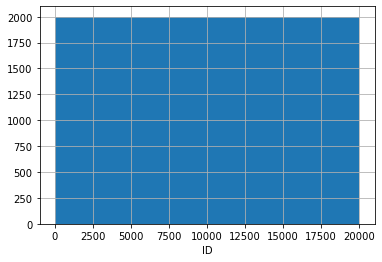

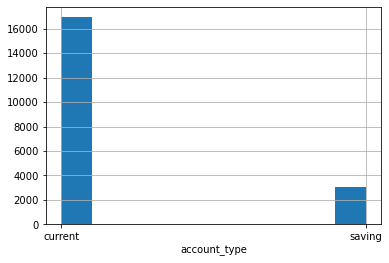

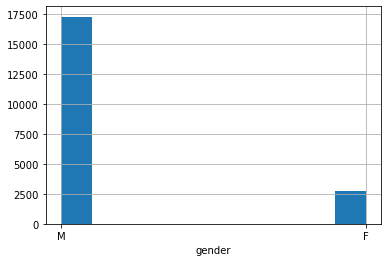

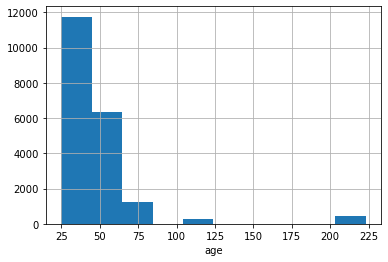

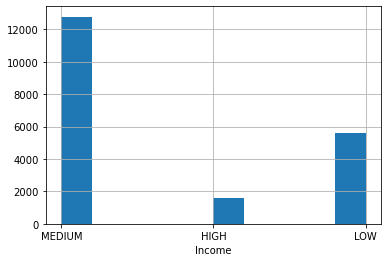

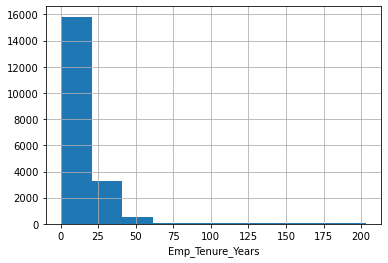

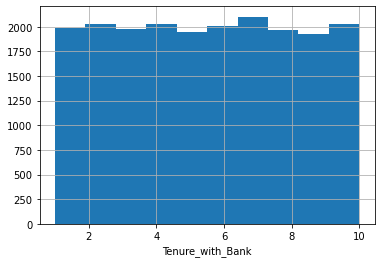

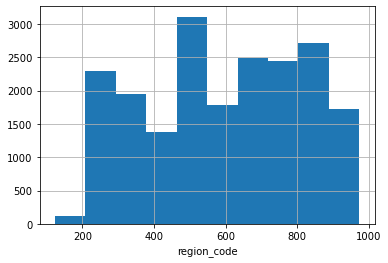

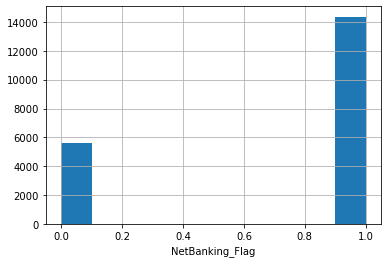

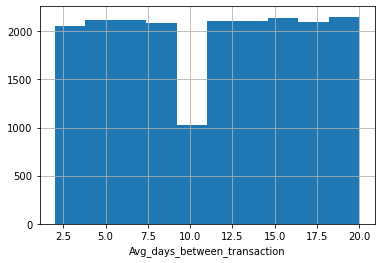

In [8]:
for i in cust_demog.columns:
    cust_demog[i].hist()
    plt.xlabel(str(i))
    plt.show()
    

In [9]:
# Insight From above Plot :

# 1) Account type : 85% of account type is current .
# 2) Gender : More than 80% of gender is Male .
# 3) Age : More than 80% of Customer is below than 75 .
# 4) Income : More than 60% of customer is medium income . Customer we have Medium > Low > high income people .
# 5) Emp_Tenure_Years : More than 70% of customer having Tenure is less than 25 years .
# 6) NetBanking_Flag : More than 70% of customer using Net Banking .

#### Data Preparation :

In [10]:
# Missing value Imputation :
cust_demog = cust_demog.apply(lambda x : x.fillna(x.mode()[0]))

In [11]:
cust_demog = pd.get_dummies(cust_demog , columns = ['account_type','gender','Income'] , drop_first= True)

In [12]:
cust_demog

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,gender_M,Income_LOW,Income_MEDIUM
0,19427,63,30.1,10,628.0,1,5.0,0,1,0,1
1,16150,36,14.4,10,656.0,0,12.0,0,1,0,1
2,11749,28,4.8,10,314.0,1,13.0,0,0,0,1
3,11635,32,9.6,2,614.0,1,19.0,0,1,0,1
4,8908,32,12.0,7,750.0,1,18.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,66,32.2,6,354.0,1,7.0,0,0,0,1
19996,15992,53,19.8,5,809.0,0,14.0,0,1,0,1
19997,7081,66,18.4,1,466.0,0,10.0,0,0,0,1
19998,6821,32,6.0,8,619.0,0,17.0,0,1,1,0


In [13]:
# Importing the second data sets .
cust_behav = pd.read_excel('C:/Users/ashis/OneDrive/Documents/Data Science 360 Assignment/Machine learning/Case Study - 1/CustomerBehaviorData.xlsx')

In [14]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
cust_behav

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.20,130000.00,300500.0,12174.0,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.00,3.00,610000.0,2351.0,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,62,42,360000,1,1,1.0,1,27324.00,176487.60,2156.0,3735.0,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,12,58,155000,1,1,1.0,1,370776.00,63000.00,26241.0,0.0,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,5,80,362000,1,1,1.0,1,10006.20,7216.53,13873.0,-4679.0,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,2,26,595000,1,1,1.0,1,84446.00,961916.90,492.0,553.0,41314.91,37646.41,6.0,14,27825.0,34952.75,45461.00,35,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,1,58,13000,1,1,1.0,1,1892440.00,295150.90,10271.0,20324.0,216.25,1605.00,32.0,26,27912.0,17261.41,85422.00,5,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,2,17,124000,1,1,1.0,1,115.45,200015.58,30000.0,6885.0,89327.00,80044.00,32.0,14,14580.0,142002.00,68985.86,10,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,1,44,67,371000,1,1,1.0,1,48796.45,1631.11,925.0,10455.0,191780.00,66057.00,40.0,5,23881.0,156995.05,13558.00,11,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29


In [15]:
cust_behav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

#### Data Preparation :

In [16]:
# Impute Missing Value :

cust_behav[['cc_cons_may','dc_cons_jun','investment_3']] = cust_behav[['cc_cons_may','dc_cons_jun','investment_3']].apply( lambda x: x.fillna( x.mean() ) )
cust_behav[['cc_count_apr','personal_loan_closed','debit_count_apr','loan_enq','emi_active']] = cust_behav[['cc_count_apr','personal_loan_closed','debit_count_apr','loan_enq','emi_active']].apply( lambda x: x.fillna( x.mode()[0]))

In [17]:
cust_behav.columns

Index(['ID', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'emi_active'], dtype='object')

In [18]:
cust_behav = pd.get_dummies(cust_behav ,columns = ['loan_enq'] )

In [19]:
# Handling Outlier Treatment :
cust_behav = cust_behav.select_dtypes(exclude='object').apply( lambda x: x.clip( lower = x.quantile(0.01), upper = x.quantile(0.99) ) )

In [20]:
## All Graph / Plot is here .

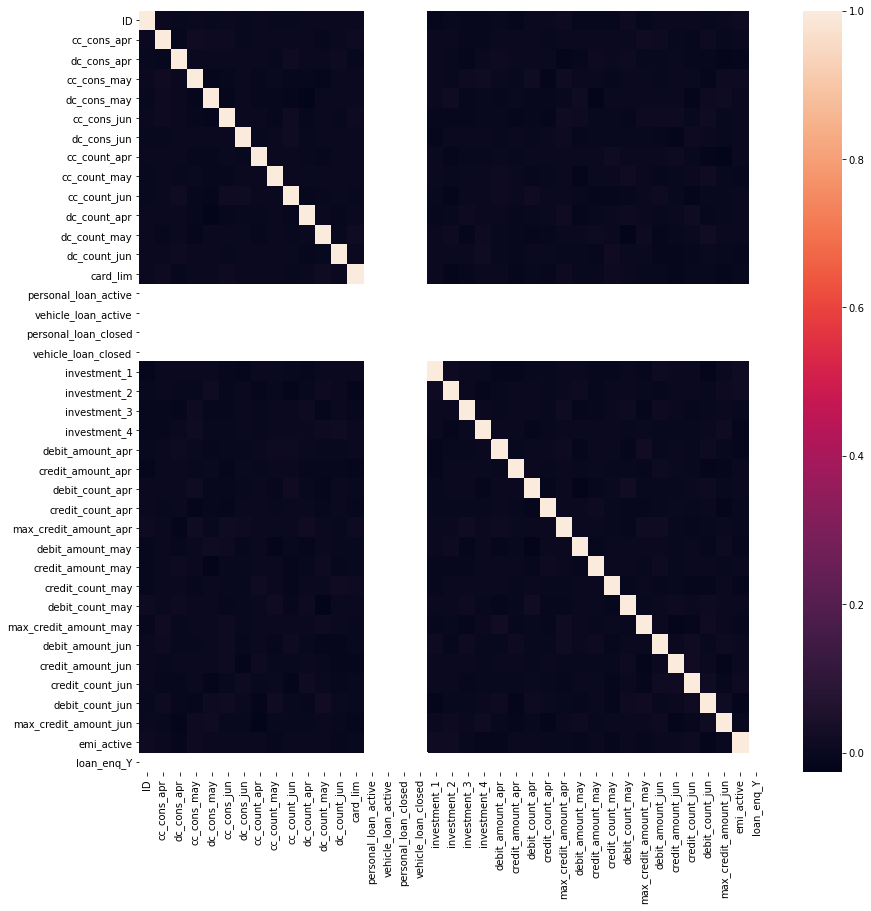

In [21]:
plt.figure(figsize=(14,14))
sns.heatmap(cust_behav.corr())
plt.show()

In [22]:
# cust_behav.corr().to_excel('C:/Users/ashis/OneDrive/Documents/Data Science 360 Assignment/Machine learning/Case Study - 1/heatmap.xlsx')

In [23]:
cust_behav.drop(columns = ['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq_Y'], inplace= True)

In [24]:
cust_behav.duplicated().sum()
# No duplicate record is present .

0

In [25]:
## Need to draw some graph or do EDA in cust_behav

<AxesSubplot:>

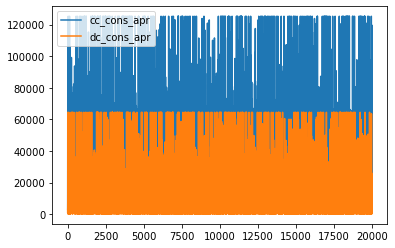

In [26]:
cust_behav[['cc_cons_apr','dc_cons_apr']] .plot(kind='line')
# It's shows that majority of customer are spending more from credit card as compared to debit card .

<AxesSubplot:>

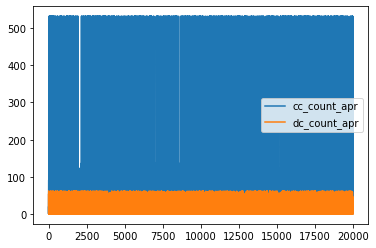

In [27]:
cust_behav[['cc_count_apr','dc_count_apr']] .plot(kind='line')
# Customers using credit card more as compared to debit card .

In [28]:
cust_behav.loc[cust_behav.card_lim < cust_behav.cc_cons_apr, 'ID' ]
# These are the customer which are spending more than maximum limit by credit card .

7        15315.00
92       12279.00
156      10210.00
179       5848.00
239      15250.00
           ...   
19779      199.99
19786    17375.00
19861    19735.00
19965    17795.00
19968    17680.00
Name: ID, Length: 513, dtype: float64

In [29]:
cust_behav.loc[cust_behav.cc_cons_may < cust_behav.dc_cons_may, 'ID' ]
# Customer who is spending by debit card more as compared to credit card .

0        17051.0
2         7433.0
8        16912.0
9         1313.0
10       10076.0
          ...   
19988    12984.0
19990     3187.0
19991     5898.0
19997    18740.0
19999    12413.0
Name: ID, Length: 6328, dtype: float64

In [30]:
cust_behav.loc[cust_behav.cc_cons_jun < cust_behav.dc_cons_jun, 'ID' ]
# Customer who is spending by debit card more as compared to credit card .

0        17051.0
8        16912.0
9         1313.0
11        1613.0
12         915.0
          ...   
19986    16199.0
19990     3187.0
19991     5898.0
19998    18134.0
19999    12413.0
Name: ID, Length: 6826, dtype: float64

In [31]:
cust_behav.loc[cust_behav.credit_amount_apr<cust_behav.debit_amount_apr,'ID']
# customer debit more amount to the credit amount .

3        14606.0
6        14847.0
7        15315.0
9         1313.0
10       10076.0
          ...   
19993    14555.0
19995    12512.0
19997    18740.0
19998    18134.0
19999    12413.0
Name: ID, Length: 9275, dtype: float64

In [32]:
# Importing the Third data sets :
credit_cons = pd.read_excel('C:/Users/ashis/OneDrive/Documents/Data Science 360 Assignment/Machine learning/Case Study - 1/CreditConsumptionData.xlsx')

In [33]:
Cust_behav_credit_cons = pd.merge(left = cust_behav , right = credit_cons , on = 'ID' )
final_data = pd.merge(left = cust_demog , right = Cust_behav_credit_cons , on = 'ID' )

In [34]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19600 entries, 0 to 19599
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            19600 non-null  int64  
 1   age                           19600 non-null  int64  
 2   Emp_Tenure_Years              19600 non-null  float64
 3   Tenure_with_Bank              19600 non-null  int64  
 4   region_code                   19600 non-null  float64
 5   NetBanking_Flag               19600 non-null  int64  
 6   Avg_days_between_transaction  19600 non-null  float64
 7   account_type_saving           19600 non-null  uint8  
 8   gender_M                      19600 non-null  uint8  
 9   Income_LOW                    19600 non-null  uint8  
 10  Income_MEDIUM                 19600 non-null  uint8  
 11  cc_cons_apr                   19600 non-null  float64
 12  dc_cons_apr                   19600 non-null  float64
 13  c

In [35]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
final_data

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,gender_M,Income_LOW,Income_MEDIUM,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,19427,63,30.1,10,628.0,1,5.0,0,1,0,1,7998.48,2289.00,9553.00,2879.58,6881.81,3124.00,8.0,23,13,47,3,30,519000,13659.00,14000.00,80000.0,6885.0,79085.00,44630.50,63.0,1,48134.00,107662.02,61887.50,5,14,20770.0,44884.90,369000.75,40,96,46088.0,2646.72,NaN
1,16150,36,14.4,10,656.0,0,12.0,0,1,0,1,16479.64,415.00,7386.49,6763.00,12032.60,6738.00,19.0,32,7,1,37,16,402000,942327.70,172131.00,28912.0,553.0,85171.16,216770.95,10.0,1,31820.00,34376.79,36644.25,4,63,78627.0,91073.84,243182.32,7,12,17953.0,5469.79,NaN
2,11749,28,4.8,10,314.0,1,13.0,0,0,0,1,29272.03,40994.00,4170.53,26717.30,531.43,3778.00,12.0,30,44,22,15,37,114000,70310.60,208652.00,1036.0,1089.0,44916.42,24878.00,55.0,33,389576.00,140182.87,50121.00,6,82,1260.0,96552.00,35467.00,16,42,41121.0,7207.85,NaN
3,11635,32,9.6,2,614.0,1,19.0,0,1,0,1,9662.31,5306.39,5261.00,11934.79,7996.00,293.00,24.0,85,47,4,1,1,298000,101891.25,100934.00,678.0,1931.0,21563.58,224329.00,32.0,7,159847.00,42694.75,24917.00,2,78,23332.0,18250.00,87204.35,2,10,32003.0,591.34,NaN
4,8908,32,12.0,7,750.0,1,18.0,0,1,0,0,13239.86,7063.00,19193.13,22304.86,5984.75,4933.00,100.0,9,14,62,55,81,381000,27316.50,90829.65,12000.0,10455.0,59644.00,43451.00,67.0,1,57312.04,146116.14,41381.00,3,171,41672.0,83525.75,83992.00,21,12,9626.0,2621.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19595,1270,66,32.2,6,354.0,1,7.0,0,0,0,1,4611.00,12015.50,69121.74,550.50,400.00,828.04,5.0,43,9,39,25,42,255000,199690.50,152664.00,51520.0,13135.0,39148.00,56225.00,29.0,35,29730.00,179983.00,61078.00,0,8,24438.0,153772.21,31284.00,3,38,42872.0,6334.20,NaN
19596,15992,53,19.8,5,809.0,0,14.0,0,1,0,1,9545.00,2061.00,4269.27,901.00,7977.50,5299.00,1.0,30,30,8,5,22,518000,3938.25,1752254.00,15477.0,4856.0,90755.10,26953.00,5.0,13,22103.00,17754.66,37545.00,47,11,213000.0,18098.47,93108.00,43,11,36747.0,102216.02,NaN
19597,7081,66,18.4,1,466.0,0,10.0,0,0,0,1,2028.93,9454.99,11019.00,4774.50,793.08,72564.00,6.0,6,1,2,4,13,359000,65640.00,64309.52,13873.0,2008.0,275542.16,26327.00,11.0,3,44500.00,22093.59,48230.00,2,171,34327.0,32198.63,46800.00,3,38,18810.0,1930.19,NaN
19598,6821,32,6.0,8,619.0,0,17.0,0,1,1,0,11456.23,3999.00,2650.08,290.00,21111.50,11827.46,5.0,6,117,4,9,2,523000,47936.43,11982.00,3975.0,2351.0,60498.50,12276.00,5.0,26,52612.00,23546.48,112616.76,3,82,51929.0,27334.14,20201.00,47,80,11443.0,24499.91,NaN


In [36]:
#Checking Missing values
final_data.isnull().sum()

ID                                 0
age                                0
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        0
NetBanking_Flag                    0
Avg_days_between_transaction       0
account_type_saving                0
gender_M                           0
Income_LOW                         0
Income_MEDIUM                      0
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        0
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        0
cc_count_apr                       0
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
investment_1                       0
investment_2                       0
investment_3                       0
i

In [37]:
final_data.shape

(19600, 45)

In [38]:
final_data.columns

Index(['ID', 'age', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code', 'NetBanking_Flag', 'Avg_days_between_transaction', 'account_type_saving', 'gender_M', 'Income_LOW', 'Income_MEDIUM', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'cc_cons'], dtype='object')

## Linear Regression Model :

#### Normality Checking .

In [39]:
final_data['ln_cc_cons'] = np.log(final_data.cc_cons).replace([np.inf, -np.inf], np.nan)

<AxesSubplot:>

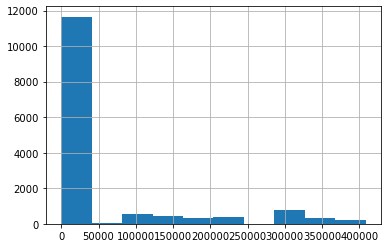

In [40]:
##Checking the Distribution of Credit_Amount
# Target variable following Exponential distribution.
final_data.cc_cons.hist()

<AxesSubplot:xlabel='ln_cc_cons', ylabel='Density'>

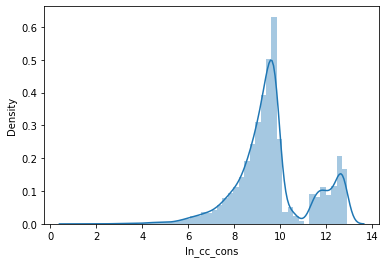

In [41]:
# Distribution of Target variable :
sns.distplot(final_data.ln_cc_cons)

In [42]:
# Missing & Not Missing value :
train_data = final_data[final_data.cc_cons.notna()]
test_data = final_data[final_data.cc_cons.isna()]

<AxesSubplot:>

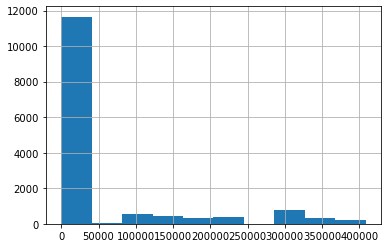

In [43]:
##Checking the Distribution of Credit_Amount
# Target variable following Exponential distribution.
train_data.cc_cons.hist()

<AxesSubplot:xlabel='ln_cc_cons', ylabel='Density'>

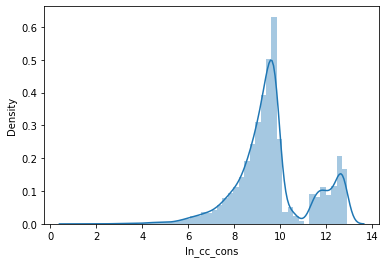

In [44]:
# Distribution of Target variable :
sns.distplot(train_data.ln_cc_cons)

In [45]:
train_data.shape

(14712, 46)

In [46]:
test_data.shape

(4888, 46)

In [47]:
train_data.isna().sum()

ID                              0
age                             0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
account_type_saving             0
gender_M                        0
Income_LOW                      0
Income_MEDIUM                   0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
debit_amount_apr                0
credit_amount_

In [48]:
train_data.fillna(train_data.mean(),inplace=True)

In [49]:
train_data.isna().sum()

ID                              0
age                             0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
account_type_saving             0
gender_M                        0
Income_LOW                      0
Income_MEDIUM                   0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
debit_amount_apr                0
credit_amount_

In [50]:
test_data.isna().sum()

ID                                 0
age                                0
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        0
NetBanking_Flag                    0
Avg_days_between_transaction       0
account_type_saving                0
gender_M                           0
Income_LOW                         0
Income_MEDIUM                      0
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        0
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        0
cc_count_apr                       0
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
investment_1                       0
investment_2                       0
investment_3                       0
i

### Variable Reduction :

In [51]:
#Selecting features
train_x = train_data[train_data.columns.difference(['cc_cons','ln_cc_cons']) ]
train_y = train_data['ln_cc_cons']
test_x = test_data[test_data.columns.difference(['cc_cons', 'ln_cc_cons'])]
test_y = test_data['ln_cc_cons'] 

In [52]:
train_y.isna().sum()

0

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#import itertools

#Checking RFE 

lm = LinearRegression()
#create the RFE model and select 30 attributes
rfe = RFE(lm, n_features_to_select=30)
rfe = rfe.fit(train_x, train_y)

In [54]:
x_vars = train_data.columns.difference(['cc_cons', 'ln_cc_cons']) # Since feature selection step is before

# train & test so here i have to use whole data .     Above will give only column name.

In [55]:
from sklearn.feature_selection import f_regression

In [56]:
f_values, p_val = f_regression( train_x,train_y )

# Since it will give in o/p two value so we will use two var. to store that value . They will do in the backend check for 
# one x VAR. AT ATIME & Y VAR, then find a f value b/w them to check which is significant or not . 

In [57]:
#### F - Regression

# Feature Selection based on importance
from sklearn.feature_selection import f_regression


#F_values, p_values  = f_regression(features1, target )

#RFE_features=features.columns[rfe.get_support()]
#features1 = features[RFE_features]

#rfe # I do step form LR clas 19 

f_values, p_val = f_regression( train_x,train_y)

In [58]:
f_reg = pd.DataFrame([x_vars, f_values, p_val]).T

# To understand the data in proper way we will see in pd.DataFrame . 

In [59]:
f_reg.columns = ['Featrues', 'F_Value', 'P_Value'] 

# Bcz above we didn't get col name We will use .columns when we want for all column to rename but we can use only rename ..
f_reg

,Featrues,F_Value,P_Value
0,Avg_days_between_transaction,2.204501,0.13763
1,Emp_Tenure_Years,2.44784,0.117708
2,ID,1.525212,0.216852
3,Income_LOW,0.064515,0.799501
4,Income_MEDIUM,0.446235,0.504139
5,NetBanking_Flag,0.035204,0.851172
6,Tenure_with_Bank,0.254817,0.613711
7,account_type_saving,0.810624,0.367951
8,age,1.570297,0.210184
9,card_lim,0.585383,0.444222


In [60]:
f_reg.sort_values('P_Value' , ascending = False )

# Now we will see the var. on the basis of P_Value which is highly significant or
# not so this will be done what CI we will choose although if some var. is not show significant then we can take that 
# var also depending on the busines domain knowledge that this var. is imp. or not ..
# So we can easily take var. which we need or which we don't need ..

,Featrues,F_Value,P_Value
14,cc_count_jun,0.000497,0.982205
19,credit_count_apr,0.001858,0.965617
39,investment_4,0.005679,0.939931
5,NetBanking_Flag,0.035204,0.851172
35,gender_M,0.039639,0.842191
28,debit_amount_apr,0.041097,0.839355
3,Income_LOW,0.064515,0.799501
33,debit_count_may,0.074002,0.785601
42,max_credit_amount_may,0.098311,0.753871
40,max_credit_amount_apr,0.108764,0.741561


In [61]:
features = list( f_reg.loc[ f_reg.P_Value <= 0.1, 'Featrues' ] )

len(features) # we star with 48 var. something now we have only 4 var. 

5

In [62]:
features

['cc_cons_may',
 'cc_count_apr',
 'cc_count_may',
 'credit_amount_apr',
 'credit_amount_may']

In [63]:
list(f_reg.Featrues)

['Avg_days_between_transaction',
 'Emp_Tenure_Years',
 'ID',
 'Income_LOW',
 'Income_MEDIUM',
 'NetBanking_Flag',
 'Tenure_with_Bank',
 'account_type_saving',
 'age',
 'card_lim',
 'cc_cons_apr',
 'cc_cons_jun',
 'cc_cons_may',
 'cc_count_apr',
 'cc_count_jun',
 'cc_count_may',
 'credit_amount_apr',
 'credit_amount_jun',
 'credit_amount_may',
 'credit_count_apr',
 'credit_count_jun',
 'credit_count_may',
 'dc_cons_apr',
 'dc_cons_jun',
 'dc_cons_may',
 'dc_count_apr',
 'dc_count_jun',
 'dc_count_may',
 'debit_amount_apr',
 'debit_amount_jun',
 'debit_amount_may',
 'debit_count_apr',
 'debit_count_jun',
 'debit_count_may',
 'emi_active',
 'gender_M',
 'investment_1',
 'investment_2',
 'investment_3',
 'investment_4',
 'max_credit_amount_apr',
 'max_credit_amount_jun',
 'max_credit_amount_may',
 'region_code']

In [64]:
formula_m2 = 'ln_cc_cons ~ '+ ' + '.join(list(f_reg.Featrues))
formula_m2

'ln_cc_cons ~ Avg_days_between_transaction + Emp_Tenure_Years + ID + Income_LOW + Income_MEDIUM + NetBanking_Flag + Tenure_with_Bank + account_type_saving + age + card_lim + cc_cons_apr + cc_cons_jun + cc_cons_may + cc_count_apr + cc_count_jun + cc_count_may + credit_amount_apr + credit_amount_jun + credit_amount_may + credit_count_apr + credit_count_jun + credit_count_may + dc_cons_apr + dc_cons_jun + dc_cons_may + dc_count_apr + dc_count_jun + dc_count_may + debit_amount_apr + debit_amount_jun + debit_amount_may + debit_count_apr + debit_count_jun + debit_count_may + emi_active + gender_M + investment_1 + investment_2 + investment_3 + investment_4 + max_credit_amount_apr + max_credit_amount_jun + max_credit_amount_may + region_code'

In [65]:
# Suppose I want to create a model from it 

formula_m2 = 'ln_cc_cons ~ '+ ' + '.join(list(f_reg.Featrues))

lm2 = smf.ols( formula_m2 , train_data ).fit()
print (lm2.summary())

# as we see above result that we are getting diff. b/w R squared & adjusted R squared value is more & also for some var. 
# we have large value of p value & show it's insignificant  ..

                            OLS Regression Results                            
Dep. Variable:             ln_cc_cons   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.076
Date:                Fri, 07 Apr 2023   Prob (F-statistic):              0.338
Time:                        20:19:25   Log-Likelihood:                -27862.
No. Observations:               14712   AIC:                         5.581e+04
Df Residuals:                   14667   BIC:                         5.616e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

#### multicolinearity

In [66]:
# import the packages for vif(Variation Inflation Factor )
from statsmodels.stats.outliers_influence import variance_inflation_factor # It will take the data inthe form of design matrices
from patsy import dmatrices # To use dmatrices in VIF we have to create it by importing lib.

In [67]:
# dmatrices is in the form of numpy array with all the x variable with intercept(C) which equal to 1

model_param = 'ln_cc_cons ~ ' + ' + '.join(list(f_reg.Featrues))

In [68]:
model_param

'ln_cc_cons ~ Avg_days_between_transaction + Emp_Tenure_Years + ID + Income_LOW + Income_MEDIUM + NetBanking_Flag + Tenure_with_Bank + account_type_saving + age + card_lim + cc_cons_apr + cc_cons_jun + cc_cons_may + cc_count_apr + cc_count_jun + cc_count_may + credit_amount_apr + credit_amount_jun + credit_amount_may + credit_count_apr + credit_count_jun + credit_count_may + dc_cons_apr + dc_cons_jun + dc_cons_may + dc_count_apr + dc_count_jun + dc_count_may + debit_amount_apr + debit_amount_jun + debit_amount_may + debit_count_apr + debit_count_jun + debit_count_may + emi_active + gender_M + investment_1 + investment_2 + investment_3 + investment_4 + max_credit_amount_apr + max_credit_amount_jun + max_credit_amount_may + region_code'

In [69]:
model_param = '''ln_cc_cons ~ Avg_days_between_transaction + Emp_Tenure_Years + ID + Income_LOW + Income_MEDIUM + 
           NetBanking_Flag + Tenure_with_Bank + account_type_saving + age + card_lim + cc_cons_apr + cc_cons_jun + 
           cc_cons_may + cc_count_apr + cc_count_jun + cc_count_may + credit_amount_apr + credit_amount_jun + 
           credit_amount_may + credit_count_apr + credit_count_jun + credit_count_may + dc_cons_apr + dc_cons_jun +
           dc_cons_may + dc_count_apr + dc_count_jun + dc_count_may + debit_amount_apr + debit_amount_jun + 
           debit_amount_may + debit_count_apr + debit_count_jun + debit_count_may + emi_active + gender_M + 
           investment_1 + investment_2 + investment_3 + investment_4 + max_credit_amount_apr + max_credit_amount_jun +
           max_credit_amount_may + region_code'''

In [70]:
train_data

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,gender_M,Income_LOW,Income_MEDIUM,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,ln_cc_cons
109,12554,35,15.0,1,708.0,0,17.0,0,1,0,1,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,10,48,14,47,430000,593.200,1244.14,787.0,6885.00000,85919.48,25192.00,24.0,6,25296.0,11527.50,191777.13,2,40,24563.0,30051.32,12761.00,2,65,50836.00,1674.09,20014.0,9.904187
110,17645,35,15.0,6,123.0,0,14.0,0,1,0,0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,13,3,21,31,127500,213557.150,172678.56,90525.0,1500.00000,12255.75,88693.37,35.0,36,80750.0,92276.57,71162.00,2,78,23948.0,42119.05,76206.00,21,63,23226.00,13043.34,10173.0,9.227492
111,7604,55,24.5,1,802.0,1,3.0,0,1,0,1,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,102,4,1,80,199999,165907.570,470000.00,25524.0,3735.00000,34193.00,84880.00,72.0,9,38466.0,19343.00,70978.00,2,82,10752.0,58373.25,75283.00,7,1,27036.00,25375.27,16095.0,9.686264
112,1590,29,4.5,6,867.0,1,4.0,0,0,0,1,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,50,1,1,10,155000,81872.650,223379.40,48500.0,-4679.00000,11558.23,236326.00,43.0,30,52732.0,43867.91,63033.84,23,38,12607.0,69851.51,68708.00,21,83,43037.00,3544.33,7707.0,8.949884
113,16556,34,12.6,4,802.0,1,7.0,0,1,0,1,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,82,54,16,68,297000,568.800,385000.00,183999.0,6916.00000,17022.81,58897.03,46.0,36,19613.0,153253.71,30286.00,24,50,25213.0,10071.00,80140.00,8,32,32044.00,12780.44,96408.0,11.476344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14816,6995,53,13.2,9,653.0,1,20.0,0,0,1,0,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,44,55,29,520000,186189.000,24000.00,16215.0,977.00000,30608.54,31135.00,79.0,2,27608.0,30501.77,23692.00,1,8,6936.0,487751.19,42625.50,14,8,82851.00,78966.76,4263.0,8.357728
14817,10376,44,2.4,9,535.0,1,2.0,0,1,0,1,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,7,1,2,472000,24832.000,221000.00,12337.0,-6281.37988,39903.00,23797.00,43.0,2,30512.0,57918.69,50023.00,4,20,202639.0,8666.01,34987.55,11,18,118110.47,4762.10,11019.0,9.307376
14818,2181,37,3.4,9,464.0,1,8.0,0,1,0,1,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,24,3,3,44000,180615.020,253000.00,25000.0,10210.00000,29525.63,95477.27,4.0,1,41085.0,25404.75,35239.00,43,5,44421.0,97896.48,261432.00,4,73,49545.00,2877.33,404227.0,12.909732
14819,18417,220,40.0,10,536.0,1,3.0,0,1,0,1,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,3,9,1,359000,3299447.136,393982.10,3975.0,-4664.00000,119370.54,59644.00,3.0,29,19110.0,46086.90,82193.00,3,25,22409.0,22693.92,33025.29,3,80,16130.00,13006.84,28813.0,10.268582


In [71]:
train_x.values

array([[1.7000e+01, 1.5000e+01, 1.2554e+04, ..., 5.0836e+04, 2.4563e+04,
        7.0800e+02],
       [1.4000e+01, 1.5000e+01, 1.7645e+04, ..., 2.3226e+04, 2.3948e+04,
        1.2300e+02],
       [3.0000e+00, 2.4500e+01, 7.6040e+03, ..., 2.7036e+04, 1.0752e+04,
        8.0200e+02],
       ...,
       [8.0000e+00, 3.4000e+00, 2.1810e+03, ..., 4.9545e+04, 4.4421e+04,
        4.6400e+02],
       [3.0000e+00, 4.0000e+01, 1.8417e+04, ..., 1.6130e+04, 2.2409e+04,
        5.3600e+02],
       [8.0000e+00, 4.6000e+00, 4.5470e+03, ..., 2.2849e+04, 8.0840e+03,
        2.6900e+02]])

In [72]:
# separate the Y and X variables
y, X = dmatrices( model_param, train_data, return_type = 'dataframe' )

In [73]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()

In [74]:
vif['Features'] = train_x.columns
vif['VIF_Factor'] = [ variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1]) ]

In [75]:
vif.round(1).sort_values(by = 'VIF_Factor', ascending = False) # It will give the O/P now we can see which is show more multi-
# collinearity as we can see that pwer performance factor & Horsepower it's value is coming higher as we see in excel also
# so on the basis of business knowledge we can remove one var. 
# Don't see intercept value we can't do anything with that ..

,Features,VIF_Factor
8,age,9.8
43,region_code,7.5
4,Income_MEDIUM,7.5
35,gender_M,6.7
0,Avg_days_between_transaction,4.8
1,Emp_Tenure_Years,4.5
6,Tenure_with_Bank,4.5
2,ID,4.0
3,Income_LOW,3.8
5,NetBanking_Flag,3.4


In [76]:
features = list(vif.loc[vif.VIF_Factor < 4 , 'Features'])
features

['ID',
 'Income_LOW',
 'NetBanking_Flag',
 'account_type_saving',
 'card_lim',
 'cc_cons_apr',
 'cc_cons_jun',
 'cc_cons_may',
 'cc_count_apr',
 'cc_count_jun',
 'cc_count_may',
 'credit_amount_apr',
 'credit_amount_jun',
 'credit_amount_may',
 'credit_count_apr',
 'credit_count_jun',
 'credit_count_may',
 'dc_cons_apr',
 'dc_cons_jun',
 'dc_cons_may',
 'dc_count_apr',
 'dc_count_jun',
 'dc_count_may',
 'debit_amount_apr',
 'debit_amount_jun',
 'debit_amount_may',
 'debit_count_apr',
 'debit_count_jun',
 'debit_count_may',
 'emi_active',
 'investment_1',
 'investment_2',
 'investment_3',
 'investment_4',
 'max_credit_amount_apr',
 'max_credit_amount_jun',
 'max_credit_amount_may']

In [75]:
formula_m3 = 'ln_cc_cons ~ ' + ' + '.join(features)

In [92]:
formula_m3

'ln_cc_cons ~ ID + Income_LOW + NetBanking_Flag + account_type_saving + card_lim + cc_cons_apr + cc_cons_jun + cc_cons_may + cc_count_apr + cc_count_jun + cc_count_may + credit_amount_apr + credit_amount_jun + credit_amount_may + credit_count_apr + credit_count_jun + credit_count_may + dc_cons_apr + dc_cons_jun + dc_cons_may + dc_count_apr + dc_count_jun + dc_count_may + debit_amount_apr + debit_amount_jun + debit_amount_may + debit_count_apr + debit_count_jun + debit_count_may + emi_active + investment_1 + investment_2 + investment_3 + investment_4 + max_credit_amount_apr + max_credit_amount_jun + max_credit_amount_may'

In [163]:
formula_m3 = '''ln_cc_cons ~ cc_cons_may + cc_count_may + credit_amount_apr  '''

In [164]:
lm3 = smf.ols( formula_m3, train_data ).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_cc_cons   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.001
Date:                Wed, 05 Apr 2023   Prob (F-statistic):            0.00182
Time:                        13:05:06   Log-Likelihood:                -27878.
No. Observations:               14712   AIC:                         5.576e+04
Df Residuals:                   14708   BIC:                         5.579e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.5676      0.02

In [ ]:
# This model is not best with Linear regression .

## Split the data into train & test

In [76]:
train_train_x , test_test_x , train_train_y , test_test_y   = train_test_split(train_x , train_y , test_size= 0.3 , random_state= 123)

### Predict the output on train and test

In [34]:
y_train_predicted = np.exp( lm2.predict( train_train_x ) ) # Here we will use antilog , bcz we are using log in Y var. then we will do
# analysis on top of it , but when we want to compare predicted Y so we need to convert it into . log -> Number .
# bcz we have Y_actual in Number form & then we will convert the predicted to in number form . Bcz for compare we need
# in both same unit. 
y_test_predicted = np.exp( lm2.predict( test_test_x ) )

In [35]:
# MSE - Mean squared Error (This is the most common error , it will magnify the error.)
mse_train = mean_squared_error( train_train_y, y_train_predicted )
mse_test = mean_squared_error( test_test_y, y_test_predicted )

print( 'MSE: ', mse_train, mse_test)
print( 'RMSE: ', np.sqrt(mse_train), np.sqrt(mse_test))  

MSE:  244078562.51120266 245641012.34663552
RMSE:  15623.013874128214 15672.938854810718


In [36]:
# MSE - Mean squared Error (This is the most common error , it will magnify the error.)
mape_train = mean_absolute_percentage_error( train_train_y, y_train_predicted )
mape_test = mean_absolute_percentage_error( test_test_y, y_test_predicted )

print( 'MAPE: ', mape_train, mape_test)


MAPE:  1660.7685738027333 1663.5506449356812


In [37]:
# RMSPE Calculation:

rmspe = (np.sqrt(np.mean(np.square((train_train_y - y_train_predicted) / train_train_y)))) * 100
rmspe_test = (np.sqrt(np.mean(np.square((test_test_y - y_test_predicted) / test_test_y)))) * 100

In [38]:
print('RMSPE:' ,rmspe)
print('RMSPE_test:' ,rmspe_test)

RMSPE: 168759.726491936
RMSPE_test: 169061.28680172397


## Other Model Start from here :

### Split the data into train and test : 

In [77]:
# Missing & Not Missing value :
train_data = final_data[final_data.cc_cons.notna()]
test_data = final_data[final_data.cc_cons.isna()]

In [78]:
train_data.fillna(train_data.mean(),inplace=True)

In [79]:
test_data.isna().sum()

ID                                 0
age                                0
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        0
NetBanking_Flag                    0
Avg_days_between_transaction       0
account_type_saving                0
gender_M                           0
Income_LOW                         0
Income_MEDIUM                      0
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        0
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        0
cc_count_apr                       0
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
investment_1                       0
investment_2                       0
investment_3                       0
i

In [80]:
# Selecting features
train_x = train_data[final_data.columns.difference(['ln_cc_cons','cc_cons'])]
train_y = train_data['cc_cons'] + 0.00001  # I add bcz some value is 0 due to this it becomes infinite so to save from it .
test_x = test_data[final_data.columns.difference(['ln_cc_cons','cc_cons'])]
test_y = test_data['cc_cons']

In [81]:
test_y.isna().sum()

4888

In [82]:
train_train_x , test_test_x , train_train_y , test_test_y   = train_test_split(train_x , train_y , test_size= 0.3 , random_state= 123)

In [83]:
train_train_y.min()

1e-05

In [84]:
train_data['ln_cc_cons'].min()

1.0986122886681098

<AxesSubplot:>

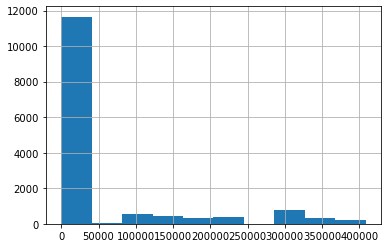

In [85]:
final_data.cc_cons.hist()

## KNN Regressor

In [86]:
import sklearn.neighbors as kn

from sklearn.neighbors import KNeighborsRegressor

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
## from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':[3,4,5,6], 'weights': ['distance', 'uniform']}

knn_grid = GridSearchCV(KNeighborsRegressor(),param_grid=param_grid, scoring='r2', cv=5 , verbose=True,n_jobs=-1)


In [89]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

st = st.fit(train_train_x) 

st.transform(train_train_x) # It will give the output in numpy array form

pd.DataFrame(st.transform(train_train_x)) # It will give the output but colname is absent ..


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,-0.923087,-0.215262,-0.619094,1.596047,-1.326973,0.624595,0.171043,-0.419812,-0.513151,-0.117118,3.073320,-0.354971,-0.294533,-0.367365,-0.329758,-0.926825,-0.318345,-0.259987,-0.276866,1.959682,-0.625268,1.107864,-0.722488,-0.470584,-0.590879,-0.746017,-0.892850,-0.700930,-0.633512,0.175564,-0.707663,-0.148148,-0.757668,-0.691100,-0.409838,0.401727,-0.273081,-0.601296,-0.497010,-1.274668,-0.280746,0.860649,0.980736,-0.506057
1,-1.650691,-0.244688,1.384325,-0.626548,0.753595,-1.601038,0.519768,-0.419812,-0.350797,1.160276,-0.742702,-0.383209,-0.703841,-0.367365,0.323176,-0.728497,-0.513813,0.454692,-0.588584,-0.506193,-0.661987,-0.122655,-0.369644,-0.000536,-0.659719,-0.693425,-0.824611,2.426172,0.675400,-0.575151,-0.577342,1.310173,0.154155,0.225302,-0.192658,0.401727,0.000573,-0.349334,-0.163868,1.297151,-0.127798,1.040590,-0.568933,-1.511242
2,1.623524,-0.480092,-0.654096,-0.626548,-1.326973,0.624595,-0.526405,-0.419812,-0.026089,0.530020,-0.679177,5.261559,-0.492730,-0.304565,0.416452,-0.265731,-0.305519,-0.044666,-0.781717,-0.347105,-0.515112,-0.474231,-0.407165,-0.462129,0.951198,-0.798610,-0.449298,0.007093,-0.254786,-0.248544,-0.461592,-0.666663,0.581571,-0.914009,-0.271459,-2.489250,-0.257799,-0.152646,-0.496568,0.334195,-0.546506,5.784561,-0.856887,0.121616
3,-1.104988,0.005430,-0.971235,-0.626548,-1.326973,0.624595,-0.526405,-0.419812,-0.350797,-0.398482,-0.309063,-0.621265,-0.745370,0.993301,1.473583,-0.034348,0.265310,0.589979,0.228233,1.721049,-0.368237,-0.650020,-0.079819,-0.285216,-0.650842,-0.693425,-0.005745,0.656114,0.099242,2.138940,-0.498679,-0.634256,0.866516,-0.691100,-0.071467,0.401727,0.965747,-0.634105,-0.479954,0.070157,-0.856715,-0.761351,-0.739545,-0.519702
4,-0.741187,-0.077943,-0.563940,1.596047,-1.326973,0.624595,0.171043,-0.419812,-0.350797,1.638595,-0.499672,-0.528472,-0.314099,-0.367365,0.665189,-0.827661,-0.504049,-0.842030,-0.837794,2.516492,-0.037767,1.928209,0.142659,-0.011560,-0.501349,-0.798610,-0.961089,-0.700930,-0.621617,-0.703832,-0.750697,-0.537034,-0.558207,-0.814939,-0.335332,0.401727,-0.116839,-0.665381,0.970842,-1.274668,-0.600719,-0.305215,-0.544881,0.458193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10293,-1.104988,0.005430,-1.456136,-0.626548,0.753595,0.624595,-1.572577,-0.419812,-0.350797,0.530020,0.417188,1.392799,2.722791,-0.409231,-0.920507,0.097870,-0.535932,2.302969,1.427457,1.959682,-0.661987,-0.357039,-0.329447,-0.374603,-0.420953,0.463608,-0.585775,-0.582926,0.649019,0.318075,-0.162538,0.305552,-1.185085,1.661824,-0.442549,0.401727,-0.195465,3.125040,0.080224,0.010233,0.046896,-0.661464,0.520818,-1.292921
10294,-1.650691,-0.489901,1.294522,-0.626548,0.753595,-1.601038,-0.177681,-0.419812,-0.058560,-1.090638,-0.099038,-0.110797,-0.451134,0.030368,-1.107060,1.750605,-0.142552,0.330691,-0.205029,-0.824371,-0.661987,1.811017,-0.656304,-0.071525,1.074349,-0.851202,1.256673,-0.464922,-0.770913,-0.601814,0.731963,-1.087956,0.467594,1.017866,2.042364,0.401727,-0.064363,0.126048,-0.481531,-0.466275,-0.649554,0.040370,-0.661053,0.935770
10295,0.895921,0.284972,-1.188495,-0.626548,0.753595,0.624595,-1.223853,2.382018,0.071324,1.368486,0.539795,-0.710867,1.359475,0.260635,-0.049929,-0.133512,-0.447304,0.007210,2.544785,1.164238,-0.221361,-0.650020,-0.032080,-0.619394,0.403571,2.093972,0.847240,-0.582926,-0.486996,-0.647929,-0.730348,0.078702,-0.957129,-0.814939,-0.377022,0.401727,-0.257770,-0.496684,-0.463930,-1.163031,0.107606,-0.308334,-0.528494,0.153454
10296,-1.104988,-0.171124,1.286567,-0.626548,-1.326973,-1.601038,0.171043,-0.419812,-0.480680,-1.085011,-0.562802,-0.652429,-0.473174,-0.409231,-0.982692,-0.067403,-0.170085,1.553144,-0.779118,1.721049,-0.661987,-0.415635,-0.620040,-0.481868,-0.243777,-0.746017,-0.2787

In [90]:
# Here we standardize (std) the data ..
train_train_x_std = st.transform(train_train_x) 
test_test_x_std = st.transform(test_test_x)

In [91]:
knn_model = knn_grid.fit(train_train_x_std, train_train_y)
knn_model.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'n_neighbors': 6, 'weights': 'distance'}

In [93]:
knn_grid = KNeighborsRegressor(n_neighbors= 6, weights= 'distance', n_jobs=-1)
knn_model = knn_grid.fit(train_train_x_std, train_train_y)


In [94]:
#Predicting values for both training and testing data sets
knn_train_pred=knn_model.predict(train_train_x_std)
knn_test_pred=knn_model.predict(test_test_x_std)

In [153]:
# MSE - Mean squared Error (This is the most common error , it will magnify the error.)
RMSE_train = np.sqrt(mean_squared_error( train_train_y, knn_train_pred ))
RMSE_test = np.sqrt(mean_squared_error( test_test_y, knn_test_pred ) )

print( 'MSE: ', RMSE_train, RMSE_test)
print( 'RMSE: ', np.sqrt(mse_train), np.sqrt(mse_test))  

# MAPE - Mean Absolute Percentage Error (This is the most common error , it will magnify the error.)
MAPE_train = mean_absolute_percentage_error( train_train_y, knn_train_pred )
MAPE_test = mean_absolute_percentage_error( test_test_y, knn_test_pred )

print( 'MAPE: ', MAPE_train, MAPE_test)



MSE:  0.006498732959088966 103542.36553612015
RMSE:  0.006498732959088966 103542.36553612015
MAPE:  5.29614385043145e-07 18.619129786006727


In [154]:
# RMSPE Calculation:

rmspe = (np.sqrt(np.mean(np.square((train_train_y - knn_train_pred) / train_train_y)))) * 100
rmspe_test = (np.sqrt(np.mean(np.square((test_test_y - knn_test_pred) / test_test_y)))) * 100

print('RMSPE:' ,rmspe)
print('RMSPE_test:' ,rmspe_test)

RMSPE: 0.0010079876968879667
RMSPE_test: 38228.57315146067


In [155]:
KNN_MAPE = MAPE_train
KNN_RMSE = RMSE_train
KNN_RMSPE = rmspe

In [97]:
# It's look like a Overfitting issue .Train accuracy is high but Test accuracy is low .

### Decision Tree Regressor

In [98]:
#Importing packages
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [99]:
#Model building
param_grid = {'max_depth': np.arange(2, 5),
             'max_features': np.arange(4,7)}
data_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5 , scoring='r2')
data_tree.fit(train_train_x,train_train_y)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([2, 3, 4]),
                         'max_features': array([4, 5, 6])},
             scoring='r2')

In [100]:
#Predicting values for both training and testing data sets
tree_train_pred= data_tree.predict(train_train_x)
tree_test_pred=data_tree.predict(test_test_x)

In [149]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train =np.mean(np.abs( (train_train_y -tree_train_pred)/train_train_y ))
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_test_y- tree_test_pred)/test_test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_train = np.sqrt(mean_squared_error(train_train_y,tree_train_pred))
print(RMSE_train)
RMSE_test =np.sqrt(mean_squared_error(test_test_y,tree_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
557810.6050038488
17.297085091010242

RMSE values for training and testing data :
98403.66266713335
95355.3701422896


In [150]:
# RMSPE Calculation:

rmspe = (np.sqrt(np.mean(np.square((train_train_y - tree_train_pred) / train_train_y)))) * 100
rmspe_test = (np.sqrt(np.mean(np.square((test_test_y - tree_test_pred) / test_test_y)))) * 100

print('RMSPE:' ,rmspe)
print('RMSPE_test:' ,rmspe_test)

RMSPE: 5660414458.515838
RMSPE_test: 29443.959349766163


In [152]:
DT_MAPE = MAPE_train
DT_RMSE = RMSE_train
DT_RMSPE = rmspe

In [103]:
# If I used this model to predict :

data_tree.predict(test_x)

array([57441.35491963, 57441.35491963, 50463.00856513, ...,
       57441.35491963, 57441.35491963, 57441.35491963])

# Ensemble Learning

### Bagging 

In [104]:
#Importing required packages
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [105]:
#Model building
pargrid_ada = {'n_estimators': [50,60,70]}

gscv_bagging = GridSearchCV(estimator=BaggingRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,n_jobs=-1)

data_bagg =gscv_bagging.fit(train_train_x, train_train_y)


In [106]:
#Predicting values for both training and testing data sets
bagg_train_pred=data_bagg.predict(train_train_x)
bagg_test_pred=data_bagg.predict(test_test_x)


In [146]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_train_y - bagg_train_pred)/train_train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_test_y- bagg_test_pred)/test_test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_train = np.sqrt(mean_squared_error(train_train_y,bagg_train_pred))
print(RMSE_train)
RMSE_test =np.sqrt(mean_squared_error(test_test_y,bagg_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
106396.5035589653
20.848210334311286

RMSE values for training and testing data :
38342.177634186286
98714.42331707211


In [147]:
# RMSPE Calculation:

rmspe = (np.sqrt(np.mean(np.square((train_train_y - bagg_train_pred) / train_train_y)))) * 100
rmspe_test = (np.sqrt(np.mean(np.square((test_test_y - bagg_test_pred) / test_test_y)))) * 100

print('RMSPE:' ,rmspe)
print('RMSPE_test:' ,rmspe_test)

RMSPE: 1079621726.6244948
RMSPE_test: 39056.06182821127


In [148]:
BAG_MAPE = MAPE_train
BAG_RMSE = RMSE_train
BAG_RMSPE = rmspe

In [109]:
# If I used this model to predict 

In [110]:
data_bagg.predict(test_x)

array([61814.16667667, 61195.16667667, 42130.11667667, ...,
       77332.75001   , 33776.81667667, 84184.46667667])

### Random Forest 

In [111]:
pargrid_ada = {'n_estimators': [50,60,70],
               'max_depth':[2,3,4]}

data_rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,n_jobs=-1)
data_rf.fit(train_train_x,train_train_y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'n_estimators': [50, 60, 70]})

In [112]:
#Predicting values for both training and testing data sets
rf_train_pred=data_rf.predict(train_train_x)
rf_test_pred=data_rf.predict(test_test_x)

In [143]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_train_y - rf_train_pred)/train_train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_test_y- rf_test_pred)/test_test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_train = np.sqrt(mean_squared_error(train_train_y,rf_train_pred))
print(RMSE_train)
RMSE_test =np.sqrt(mean_squared_error(test_test_y,rf_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
540215.3657358933
17.21838388393802

RMSE values for training and testing data :
98188.55604157574
95279.09977118623


In [144]:
# RMSPE Calculation:
rmspe = (np.sqrt(np.mean(np.square((train_train_y - rf_train_pred) / train_train_y)  ))) * 100
rmspe_test = (np.sqrt(np.mean(np.square((test_test_y - rf_test_pred) / test_test_y)))) * 100

print('RMSPE:' ,rmspe)
print('RMSPE_test:' ,rmspe_test)

RMSPE: 5481860402.851479
RMSPE_test: 28891.075046698097


In [145]:
RF_MAPE = MAPE_train
RF_RMSE = RMSE_train
RF_RMSPE = rmspe

In [115]:
# If I used this model to predict 

In [116]:
data_rf.predict(test_x)

array([56380.67346122, 58908.27867489, 57172.98144992, ...,
       56108.78609246, 57093.20851486, 53905.70110286])

## Boosting 

### Ada Bost

In [117]:
pargrid_ada = {'n_estimators': [60,70,80],
               'learning_rate': [10 ** x for x in range(-2, 2)]}

gscv_ada = GridSearchCV(estimator=AdaBoostRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,
                        verbose=True, n_jobs=-1)

data_boost=gscv_ada.fit(train_train_x, train_train_y)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [118]:
#Predicting values for both training and testing data sets
boost_train_pred=data_boost.predict(train_train_x)
boost_test_pred=data_boost.predict(test_test_x)


In [157]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_train_y - boost_train_pred)/train_train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_test_y- boost_test_pred)/test_test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_train = np.sqrt(mean_squared_error(train_train_y,boost_train_pred))
print(RMSE_train)
RMSE_test =np.sqrt(mean_squared_error(test_test_y,boost_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
598738.9128713782
18.89945748157655

RMSE values for training and testing data :
98253.47694641682
95652.27928479637


In [158]:
# RMSPE Calculation:

rmspe = (np.sqrt(np.mean(np.square((train_train_y - boost_train_pred) / train_train_y)))) * 100
rmspe_test = (np.sqrt(np.mean(np.square((test_test_y - boost_test_pred) / test_test_y)))) * 100

print('RMSPE:' ,rmspe)
print('RMSPE_test:' ,rmspe_test)

RMSPE: 6075732281.337889
RMSPE_test: 31507.487092107476


In [159]:
AD_MAPE = MAPE_train
AD_RMSE = RMSE_train
AD_RMSPE = rmspe

In [121]:
# if This model is used to predict

In [122]:
data_boost.predict(test_x)

array([65446.44551017, 65446.33156975, 61655.96122379, ...,
       63923.6999058 , 63677.06484544, 56267.98866093])

### Gradient Bost 

In [123]:
pargrid_ada = {'n_estimators': [60,70,80],
               'max_depth':[2,3,4],
               'learning_rate': [10 ** x for x in range(-2, 2)]}

gscv_ada = GridSearchCV(estimator=GradientBoostingRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,
                        verbose=True, n_jobs=-1)

data_gbm=gscv_ada.fit(train_train_x, train_train_y)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [124]:
#Predicting values for both training and testing data sets
gbm_train_pred=data_gbm.predict(train_train_x)
gbm_test_pred=data_gbm.predict(test_test_x)

In [141]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_train_y - gbm_train_pred)/train_train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_test_y- gbm_test_pred)/test_test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_train = np.sqrt(mean_squared_error(train_train_y,gbm_train_pred))
print(RMSE_train)
RMSE_test =np.sqrt(mean_squared_error(test_test_y,gbm_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
540695.9880358909
17.46790533978012

RMSE values for training and testing data :
98294.79113338458
95303.70093557551


In [126]:
# RMSPE Calculation:

rmspe = (np.sqrt(np.mean(np.square((train_train_y - gbm_train_pred) / train_train_y)))) * 100
rmspe_test = (np.sqrt(np.mean(np.square((test_test_y - gbm_test_pred) / test_test_y)))) * 100

print('RMSPE:' ,rmspe)
print('RMSPE_test:' ,rmspe_test)

RMSPE: 5486736664.165132
RMSPE_test: 30453.94579950309


In [142]:
GB_MAPE = MAPE_train
GB_RMSE = RMSE_train
GB_RMSPE = rmspe

In [127]:
# if This model is used to predict

In [128]:
data_gbm.predict(test_x)

array([56892.92389452, 61050.54925197, 56019.76349161, ...,
       56038.98725959, 56389.14666006, 54280.5304159 ])

### XG Bost 

In [129]:
#Importing Required packages
import xgboost

In [130]:
pargrid_xg = {'n_estimators': [60,70,80],
               'max_depth':[2,3,4]}

gscv_xg = GridSearchCV(estimator=xgboost.XGBRegressor(), 
                        param_grid=pargrid_xg, 
                        cv=3,n_jobs=-1)

data_xg=gscv_xg.fit(train_train_x, train_train_y)


In [131]:
#Predicting values for both training and testing data sets
xg_train_pred=data_xg.predict(train_train_x)
xg_test_pred=data_xg.predict(test_test_x)


In [139]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_train_y - xg_train_pred)/train_train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_test_y- xg_test_pred)/test_test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_train = np.sqrt(mean_squared_error(train_train_y,xg_train_pred))
print(RMSE_train)
RMSE_test =np.sqrt(mean_squared_error(test_test_y,xg_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
583467.4938754286
18.307561132173724

RMSE values for training and testing data :
95323.00963624251
95825.81244118525


In [133]:
# RMSPE Calculation:

rmspe = (np.sqrt(np.mean(np.square((train_train_y - xg_train_pred) / train_train_y)))) * 100
rmspe_test = (np.sqrt(np.mean(np.square((test_test_y - xg_test_pred) / test_test_y)))) * 100

print('RMSPE:' ,rmspe)
print('RMSPE_test:' ,rmspe_test)

RMSPE: 5920781107.701767
RMSPE_test: 35712.33603876127


In [140]:
XG_MAPE = MAPE_train
XG_RMSE = RMSE_train
XG_RMSPE = rmspe

In [134]:
# if This model is used to predict

In [135]:
data_xg.predict(test_x)

array([70373.82 , 83751.31 , 56614.074, ..., 56109.355, 64891.082,
       41824.582], dtype=float32)

### Support vector Machine 

In [ ]:
# It takes lot of time to running . So i just show here a concept but I'm unable to run it bcz. of my computer memory ..

In [ ]:
# If this model used for predict :

#### <a>Comparing metrics of each model

In [160]:
# Getting loss for each train model
metric_data = pd.DataFrame({'Regressor' : ['XGBost','GradientBost','Ada Bost','Random Forest','Bagging','Decision Tree Regressor','KNN Regressor'],
                        'MAPE %' : [XG_MAPE, GB_MAPE,AD_MAPE ,RF_MAPE,BAG_MAPE,DT_MAPE,KNN_MAPE ],
                        'RMSE %' : [XG_RMSE, GB_RMSE,AD_RMSE ,RF_RMSE,BAG_RMSE,DT_RMSE,KNN_RMSE],    
                        'RMSPE %' :[ XG_RMSPE, GB_RMSPE,AD_RMSPE ,RF_RMSPE,BAG_RMSPE,DT_RMSPE,KNN_RMSPE] })


In [163]:
#metric_data[['MAPE %','RMSE %','RMSPE %']] = metric_data[['MAPE %','RMSE %','RMSPE %']].applymap(lambda x : round((x*100),3))

metric_data

,Regressor,MAPE %,RMSE %,RMSPE %
0,XGBost,5.834675e+07,9532300.964,5.920781e+11
1,GradientBost,5.406960e+07,9829479.113,5.920781e+11
2,Ada Bost,5.987389e+07,9825347.695,6.075732e+11
3,Random Forest,5.402154e+07,9818855.604,5.481860e+11
4,Bagging,1.063965e+07,3834217.763,1.079622e+11
5,Decision Tree Regressor,5.578106e+07,9840366.267,5.660414e+11
6,KNN Regressor,0.000000e+00,0.650,1.010000e-01


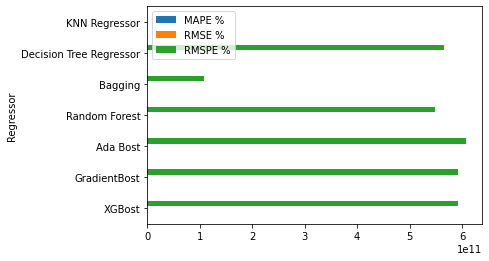

In [164]:
#Visualizing each model's accuracy and log loss metric
metric_data.plot(x = 'Regressor', y = ['MAPE %','RMSE %','RMSPE %'], kind = 'barh')
plt.legend(loc = 2)
plt.show()



In [ ]:
## Don't Run these below :

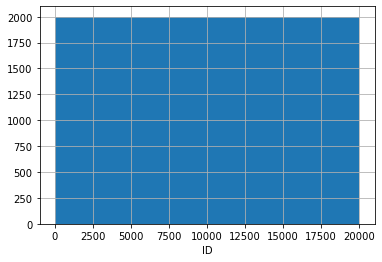

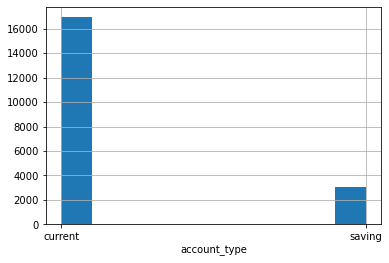

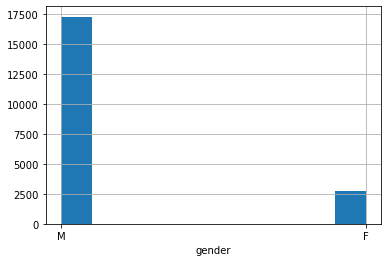

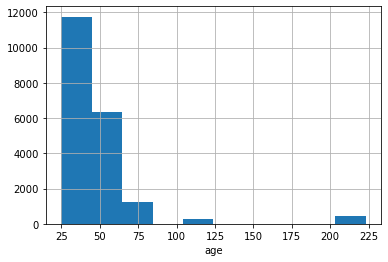

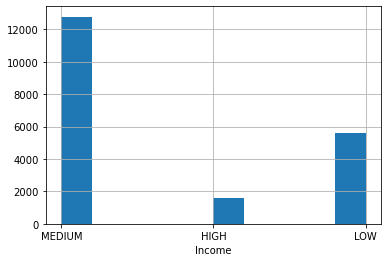

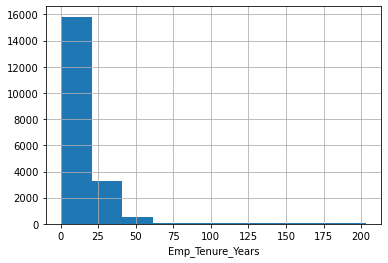

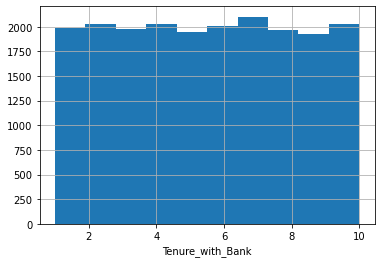

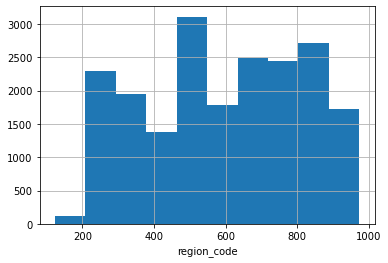

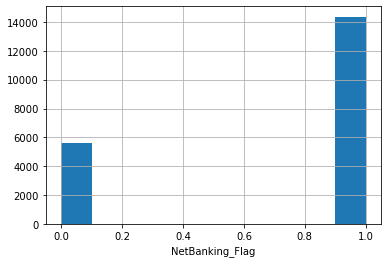

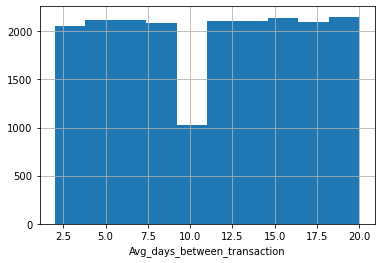

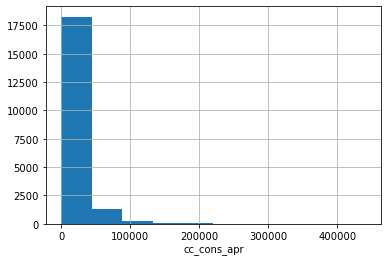

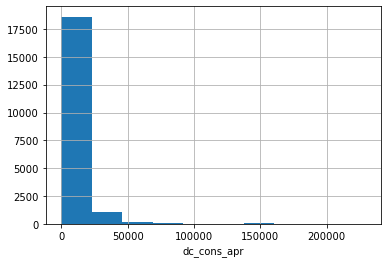

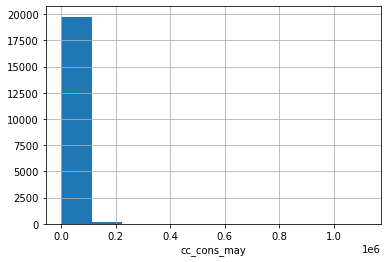

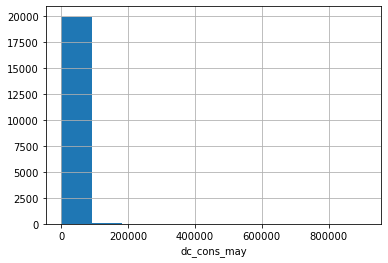

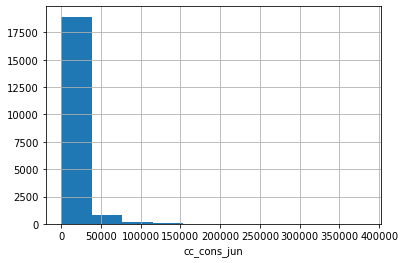

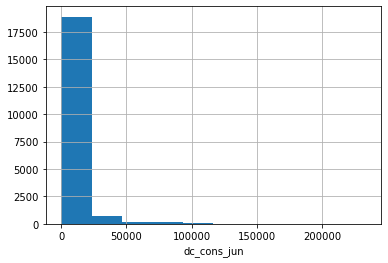

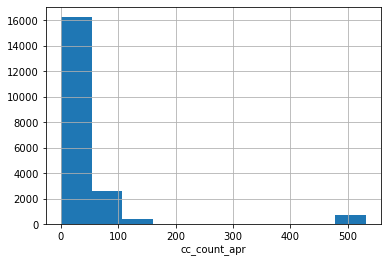

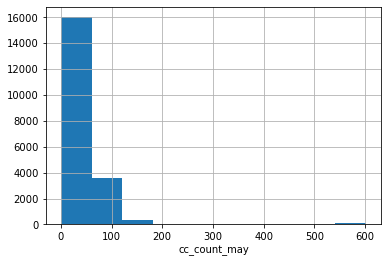

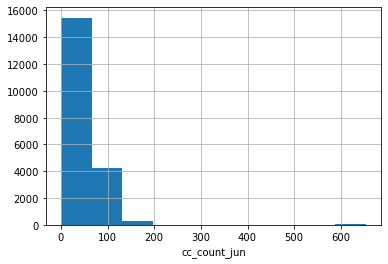

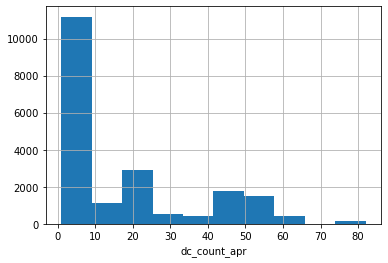

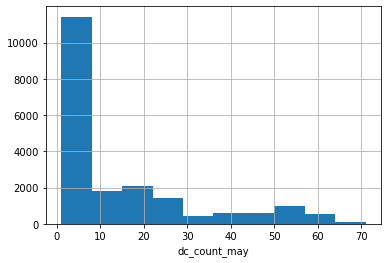

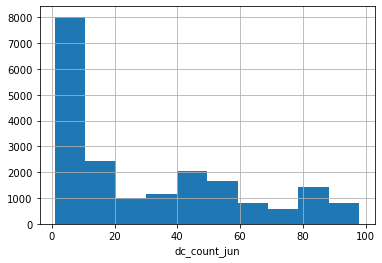

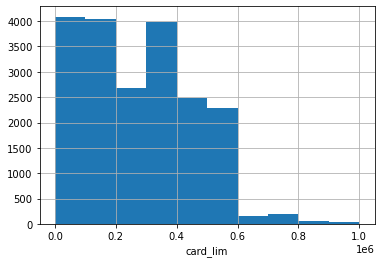

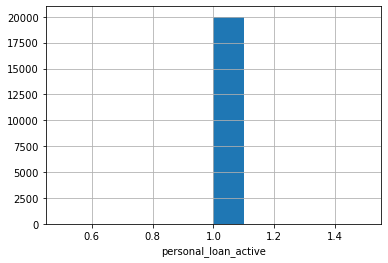

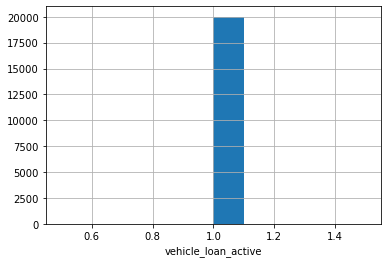

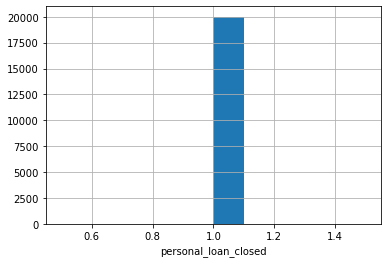

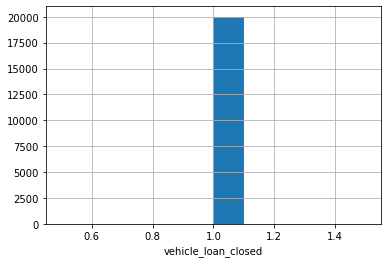

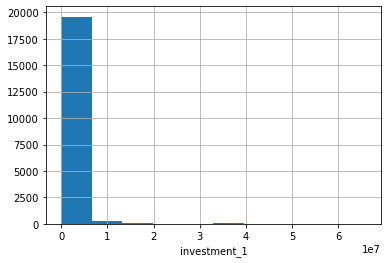

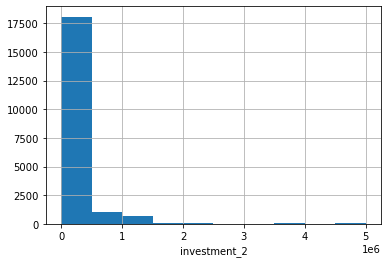

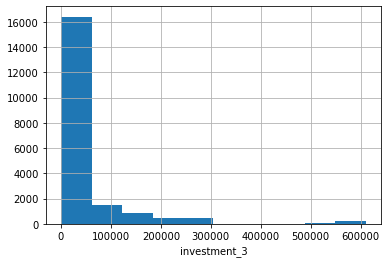

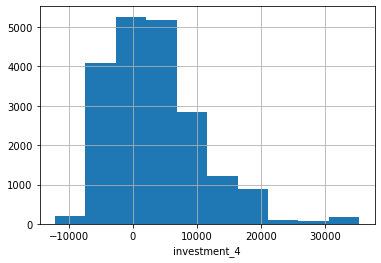

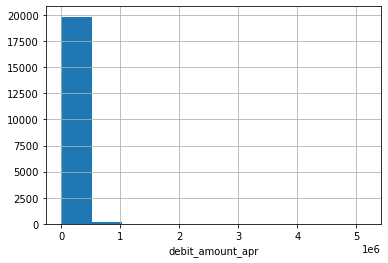

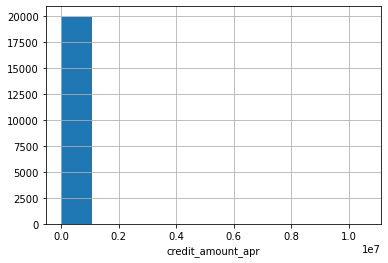

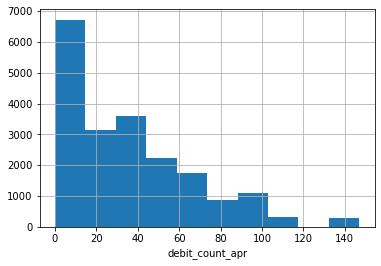

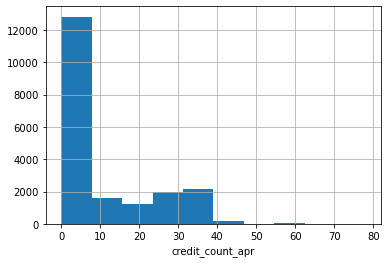

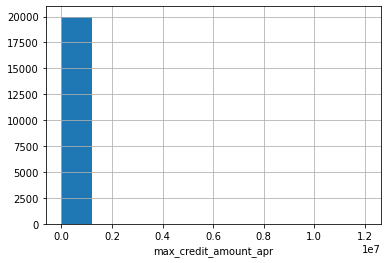

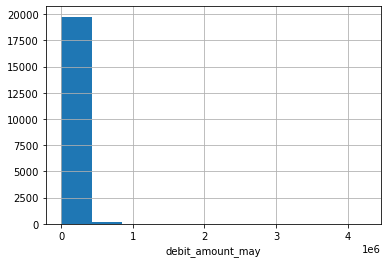

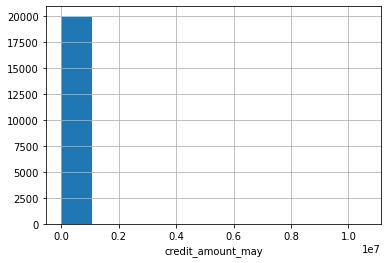

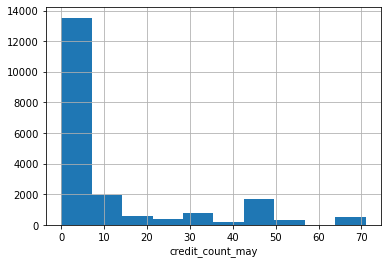

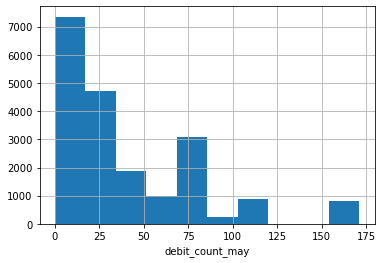

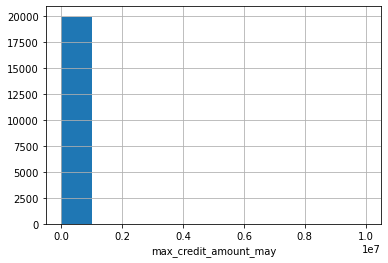

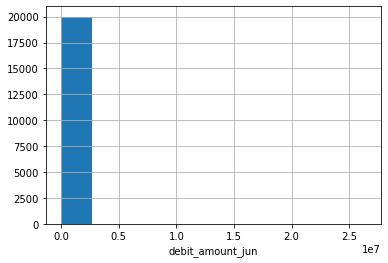

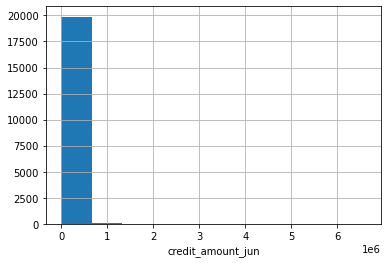

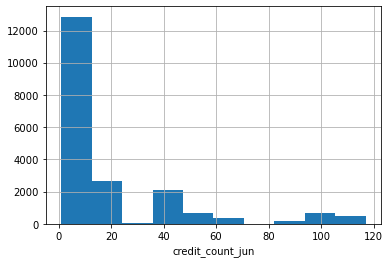

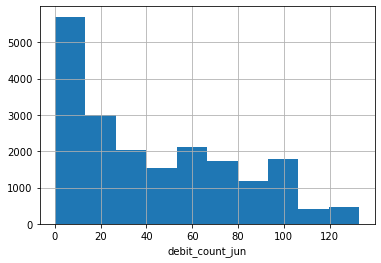

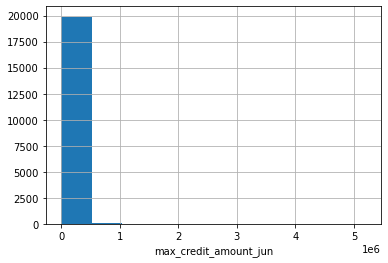

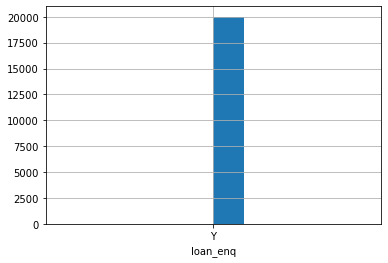

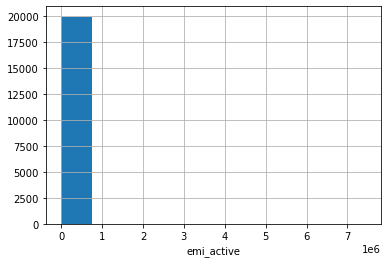

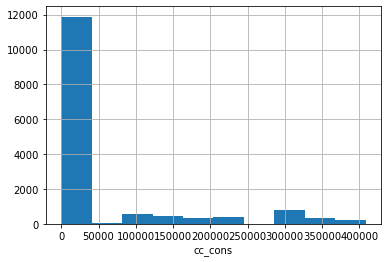

In [14]:
for i in final_data.columns:
    final_data[i].hist()
    plt.xlabel(str(i))
    plt.show()

In [48]:
final_data.drop( columns = ['ID'], axis = 1 , inplace = True)

In [49]:
final_data = pd.get_dummies(columns = ['account_type','gender', 'loan_enq'] , data = final_data , drop_first =True)

In [50]:
final_data.Income = pd.DataFrame( np.where(final_data.Income == 'LOW' , 1 ,
        np.where( final_data.Income == 'MEDIUM'  ,2,3)))

In [51]:
final_data.shape

(20000, 47)

In [52]:
def outlier_treat(x):
    x =x.clip(lower=x.quantile(0.01) , upper = x.quantile(0.99))
    return x

In [53]:
final_data = final_data.apply(outlier_treat)

In [54]:
train =final_data[final_data.cc_cons.notna()]
test = final_data[final_data.cc_cons.isna()]

In [56]:
# Selecting features
train_x = train[final_data.columns.difference(['cc_cons'])]
train_y = train['cc_cons']
test_x = test[final_data.columns.difference(['cc_cons'])]
test_y = test['cc_cons']

In [64]:
def missing_treat(x):
    if x.dtype == 'O':
        if x.isna().mean()<0.2:
            x = x.fillna(x.mode()[0])  # step replaced by knn imputation
    else:
        if x.isna().mean()<0.2:
            x = x.fillna(x.median())   # step replaced by knn imputation
    return x

In [65]:
train_x = train_x.apply(missing_treat)
test_x = test_x.apply(missing_treat)

In [66]:
#Checking Missing values
test_x.isnull().sum()[test_x.isnull().sum()>0]

Series([], dtype: int64)

In [ ]:
## Data Cleaning step done.

<AxesSubplot:>

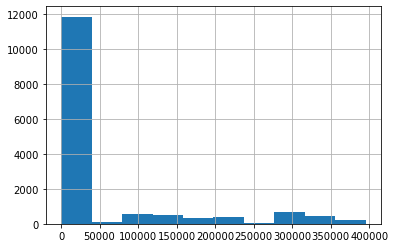

In [31]:
##Checking the Distribution of Credit_Amount
# Target variable following Exponential distribution.
final_data.cc_cons.hist()

In [73]:
#Applying transformation for target variable to make it into Near normal
final_data['ln_cc_cons'] = np.log(final_data.cc_cons)

<AxesSubplot:xlabel='ln_cc_cons', ylabel='Density'>

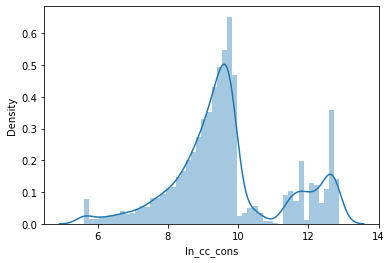

In [75]:
#Plotting transformed dependent variable
sns.distplot(final_data.ln_cc_cons)

In [67]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#import itertools

#Checking RFE 

lm = LinearRegression()
#create the RFE model and select 30 attributes
rfe = RFE(lm, n_features_to_select=30)
rfe = rfe.fit(train_x, train_y)

#### F - Regression

In [70]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression


In [72]:
rfe # I do step form LR clas 19 

RFE(estimator=LinearRegression(), n_features_to_select=30)

In [76]:
f_values, p_val = f_regression( train_x,final_data.ln_cc_cons)

ValueError: Input y contains NaN.

In [5]:
#import pandas_profiling

In [6]:
report_ML_1 = pandas_profiling.ProfileReport(final_data)

In [7]:
#report_ML_1.to_file('report_ML_1.html')

In [8]:
final_data.drop( columns = ['ID'], axis = 1 , inplace = True)

In [9]:
final_data = pd.get_dummies(columns = ['account_type','gender', 'loan_enq'] , data = final_data , drop_first =True)

In [10]:
final_data.Income = pd.DataFrame( np.where(final_data.Income == 'LOW' , 1 ,
        np.where( final_data.Income == 'MEDIUM'  ,2,3)))

In [11]:
#def outlier_treat(x):
 #   if ((x.dtype == 'i') | (x.dtype == 'f')):
  #      x=x.clip(lower = x.quantile(0.01), upper =x.quantile(0.99))
   # return x

def outlier_treat(x):
    if ((x.dtype == 'i') | (x.dtype == 'f')):
        x =x.clip(lower=x.quantile(0.01) , upper = x.quantile(0.99))
        
    return x

In [12]:
final_data = final_data.apply(outlier_treat)

In [13]:
final_data

,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type_saving,gender_M
0,63,2,30.1,10,628.0,1,5.0,7998.48,2289.00,9553.00,...,20770.0,44884.90,369000.75,40,96,46088.0,2646.72,NaN,0,1
1,36,2,14.4,10,656.0,0,12.0,16479.64,415.00,7386.49,...,78627.0,91073.84,243182.32,7,12,17953.0,5469.79,NaN,0,1
2,28,2,4.8,10,314.0,1,13.0,29272.03,40994.00,4170.53,...,1260.0,96552.00,35467.00,16,42,41121.0,7207.85,NaN,0,0
3,32,2,9.6,2,614.0,1,19.0,9662.31,5306.39,5261.00,...,23332.0,18250.00,87204.35,2,10,32003.0,591.34,NaN,0,1
4,32,3,12.0,7,750.0,1,18.0,13239.86,7063.00,19193.13,...,41672.0,83525.75,83992.00,21,12,9626.0,2621.39,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,66,2,32.2,6,354.0,1,7.0,4611.00,12015.50,69121.74,...,24438.0,153772.21,31284.00,3,38,42872.0,6334.20,NaN,0,0
19996,53,2,19.8,5,809.0,0,14.0,9545.00,2061.00,4269.27,...,213000.0,18098.47,93108.00,43,11,36747.0,102216.02,NaN,0,1
19997,66,2,18.4,1,466.0,0,10.0,2028.93,9454.99,11019.00,...,34327.0,32198.63,46800.00,3,38,18810.0,1930.19,NaN,0,0
19998,32,1,6.0,8,619.0,0,17.0,11456.23,3999.00,2650.08,...,51929.0,27334.14,20201.00,47,80,11443.0,24499.91,NaN,0,1


In [14]:
train =final_data[final_data.cc_cons.notna()]
test = final_data[final_data.cc_cons.isna()]

In [15]:
final_data.columns.difference(['cc_cons'])

Index(['Avg_days_between_transaction', 'Emp_Tenure_Years', 'Income',
       'NetBanking_Flag', 'Tenure_with_Bank', 'account_type_saving', 'age',
       'card_lim', 'cc_cons_apr', 'cc_cons_jun', 'cc_cons_may', 'cc_count_apr',
       'cc_count_jun', 'cc_count_may', 'credit_amount_apr',
       'credit_amount_jun', 'credit_amount_may', 'credit_count_apr',
       'credit_count_jun', 'credit_count_may', 'dc_cons_apr', 'dc_cons_jun',
       'dc_cons_may', 'dc_count_apr', 'dc_count_jun', 'dc_count_may',
       'debit_amount_apr', 'debit_amount_jun', 'debit_amount_may',
       'debit_count_apr', 'debit_count_jun', 'debit_count_may', 'emi_active',
       'gender_M', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'max_credit_amount_apr', 'max_credit_amount_jun',
       'max_credit_amount_may', 'personal_loan_active', 'personal_loan_closed',
       'region_code', 'vehicle_loan_active', 'vehicle_loan_closed'],
      dtype='object')

In [16]:
train_x = train[final_data.columns.difference(['cc_cons'])]
train_y = pd.DataFrame(train['cc_cons'])
test_x = test[final_data.columns.difference(['cc_cons'])]
test_y = pd.DataFrame(test['cc_cons'])

In [17]:
def missing(x):
    if ((x.dtype == 'i')| (x.dtype == 'f')) :
        x = x.fillna(x.mean())
    return x

In [20]:
train_x = train_x.apply(missing)
test_x = test_x.apply(missing)

In [21]:
train_x.apply(lambda x : x.std()/x.mean())[train_x.apply(lambda x : x.std()/x.mean()) < 0.05]

personal_loan_active    0.0
personal_loan_closed    0.0
vehicle_loan_active     0.0
vehicle_loan_closed     0.0
dtype: float64

In [22]:
test_x.apply(lambda x : x.std()/x.mean())[test_x.apply(lambda x : x.std()/x.mean()) < 0.05]

personal_loan_active    0.0
personal_loan_closed    0.0
vehicle_loan_active     0.0
vehicle_loan_closed     0.0
dtype: float64

In [23]:
train_x.drop( columns = ['personal_loan_active','personal_loan_closed','vehicle_loan_active','vehicle_loan_closed'] , axis = 1 , inplace= True)

test_x.drop( columns = ['personal_loan_active','personal_loan_closed','vehicle_loan_active','vehicle_loan_closed'] , axis = 1 , inplace= True)

In [24]:
train_x.columns

Index(['Avg_days_between_transaction', 'Emp_Tenure_Years', 'Income',
       'NetBanking_Flag', 'Tenure_with_Bank', 'account_type_saving', 'age',
       'card_lim', 'cc_cons_apr', 'cc_cons_jun', 'cc_cons_may', 'cc_count_apr',
       'cc_count_jun', 'cc_count_may', 'credit_amount_apr',
       'credit_amount_jun', 'credit_amount_may', 'credit_count_apr',
       'credit_count_jun', 'credit_count_may', 'dc_cons_apr', 'dc_cons_jun',
       'dc_cons_may', 'dc_count_apr', 'dc_count_jun', 'dc_count_may',
       'debit_amount_apr', 'debit_amount_jun', 'debit_amount_may',
       'debit_count_apr', 'debit_count_jun', 'debit_count_may', 'emi_active',
       'gender_M', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'max_credit_amount_apr', 'max_credit_amount_jun',
       'max_credit_amount_may', 'region_code'],
      dtype='object')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_train_x , test_test_x , train_train_y , test_test_y   = train_test_split(train_x , train_y , test_size= 0.3 , random_state= 123)

In [27]:
test_test_x = test_test_x.apply(lambda x : x.fillna(x.mean()))

In [28]:
import sklearn.neighbors as kn

In [29]:
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor

In [30]:
kn_model = KNeighborsRegressor(n_neighbors= 5 , weights= 'distance')

In [31]:
kn_model.fit(train_train_x , train_train_y)

KNeighborsRegressor(weights='distance')

In [32]:
import sklearn.metrics as metrics

In [33]:
test_test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 7069 to 2291
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg_days_between_transaction  4500 non-null   float64
 1   Emp_Tenure_Years              4500 non-null   float64
 2   Income                        4500 non-null   int32  
 3   NetBanking_Flag               4500 non-null   int64  
 4   Tenure_with_Bank              4500 non-null   int64  
 5   account_type_saving           4500 non-null   uint8  
 6   age                           4500 non-null   int64  
 7   card_lim                      4500 non-null   int64  
 8   cc_cons_apr                   4500 non-null   float64
 9   cc_cons_jun                   4500 non-null   float64
 10  cc_cons_may                   4500 non-null   float64
 11  cc_count_apr                  4500 non-null   float64
 12  cc_count_jun                  4500 non-null   int64  
 13  

In [34]:
print(metrics.mean_squared_error(train_train_y , kn_model.predict(train_train_x)))

print(metrics.mean_squared_error(test_test_y , kn_model.predict(test_test_x)))

0.005490604701945436
11521059660.632559


In [35]:
print(dir(metrics))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'PredictionErrorDisplay', 'RocCurveDisplay', 'SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_dist_metrics', '_pairwise_distances_reduction', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'class_likelihood_ratios', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_absolute_error_score', 'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'ge

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {'n_neighbors':[3,4,5,6,7,8], 'weights': ['distance', 'uniform']}

In [38]:
knn_grid = GridSearchCV(KNeighborsRegressor(),param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5 , verbose=True,n_jobs=-1)

In [39]:
knn_model = knn_grid.fit(train_train_x , train_train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [40]:
knn_model.best_params_

{'n_neighbors': 8, 'weights': 'uniform'}

In [41]:
knn_model = KNeighborsRegressor(n_neighbors=8, weights='uniform')

knn_model = knn_model.fit(train_train_x, train_train_y)

print(np.sqrt(metrics.mean_squared_error(train_train_y, knn_model.predict(train_train_x))))

print(np.sqrt(metrics.mean_squared_error(test_test_y, knn_model.predict(test_test_x))))

91529.14376103657
104601.78780984567


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
st = StandardScaler()

In [44]:
st = st.fit(train_train_x) 

In [45]:
st.transform(train_train_x) # It will give the output in numpy array form

array([[ 1.44246885, -0.56956863, -1.41073386, ..., -0.27680212,
        -0.16288502, -0.69478889],
       [-0.55848178,  0.86534642,  0.35247356, ..., -0.08448275,
        -0.18882552, -0.49940954],
       [ 0.35104124,  0.25257131, -1.41073386, ..., -0.3219828 ,
        -0.18250438, -1.02647942],
       ...,
       [-1.10419559, -0.40105547,  0.35247356, ..., -0.1856368 ,
        -0.17292465,  0.681954  ],
       [ 0.53294584, -0.69723011,  0.35247356, ..., -0.12526443,
         0.57826477, -0.28131165],
       [-1.6499094 , -0.71765595,  0.35247356, ..., -0.37458109,
        -0.10956977,  0.18214635]])

In [46]:
pd.DataFrame(st.transform(train_train_x)) # It will give the output but colname is absent ..

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.442469,-0.569569,-1.410734,0.626114,-1.226640,-0.426809,-0.489336,1.391074,-0.602097,-0.197101,...,-0.117212,0.398834,-0.183276,-0.378612,0.064791,0.242397,0.050914,-0.276802,-0.162885,-0.694789
1,-0.558482,0.865346,0.352474,0.626114,0.169952,-0.426809,0.420676,1.519798,-0.592041,0.422388,...,-0.077687,0.398834,-0.170508,-0.413126,-0.350378,-0.455646,0.432256,-0.084483,-0.188826,-0.499410
2,0.351041,0.252571,-1.410734,0.626114,-1.226640,-0.426809,0.420676,-0.724474,-0.343518,-0.389942,...,-0.129203,0.398834,-0.198380,-0.373978,-0.363995,-0.951303,-0.133887,-0.321983,-0.182504,-1.026479
3,-1.104196,-0.411268,0.352474,0.626114,-1.575788,-0.426809,-0.590448,0.266140,-0.528132,-0.490527,...,0.345405,0.398834,-0.201039,-0.360967,-0.372613,-0.478181,1.153156,-0.076155,-0.159701,-1.594443
4,1.624373,0.610023,0.352474,0.626114,-1.575788,-0.426809,-0.017478,-0.019291,-0.622576,-0.284888,...,-0.116367,0.398834,1.322161,0.092685,-0.367831,-0.160937,-0.142598,-0.260837,-0.121622,-0.272224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,-0.922291,1.733444,-1.410734,0.626114,-0.877492,-0.426809,2.375515,-0.651717,-0.026057,0.359071,...,-0.073581,0.398834,-0.181513,0.346492,-0.119939,-0.478181,-0.143267,0.051909,-0.276035,-1.608074
10496,-1.104196,-0.482759,2.115681,0.626114,-1.575788,-0.426809,-0.455632,-1.356900,-0.426569,-0.422241,...,-0.111390,-2.507311,-0.196543,-0.372333,-0.463805,-1.287608,0.091876,-0.219365,0.029986,-1.026479
10497,-1.104196,-0.401055,0.352474,0.626114,1.566544,-0.426809,-0.657856,-0.248755,0.493933,-0.069737,...,-0.041006,0.398834,-0.201301,0.036909,-0.474347,-1.407240,-0.158712,-0.185637,-0.172925,0.681954
10498,0.532946,-0.697230,0.352474,0.626114,-0.528344,-0.426809,-0.691561,0.540378,-0.476205,-0.649334,...,-0.089273,0.398834,-0.140281,-0.484444,-0.456655,-1.109563,-0.218551,-0.125264,0.578265,-0.281312


In [47]:
train_train_x_std = pd.DataFrame(st.transform(train_train_x), columns = train_train_x.columns) # Here we standardize (std) the data ..

In [48]:
test_test_x_std = pd.DataFrame(st.transform(test_test_x), columns = train_train_x.columns)

In [49]:
# Check standardize or not .
test_test_x_std.apply(np.mean)  # Close to zero 

test_test_x_std.apply(np.std) # is close to 1 .

# In train data you will get 0 & 1 but in test approx. 

Avg_days_between_transaction    0.996683
Emp_Tenure_Years                1.119118
Income                          0.988855
NetBanking_Flag                 0.995808
Tenure_with_Bank                1.001824
account_type_saving             0.976789
age                             1.104064
card_lim                        1.013822
cc_cons_apr                     0.934966
cc_cons_jun                     1.106279
cc_cons_may                     1.129421
cc_count_apr                    0.999711
cc_count_jun                    0.921880
cc_count_may                    1.050408
credit_amount_apr               1.029363
credit_amount_jun               1.491949
credit_amount_may               0.859774
credit_count_apr                0.983740
credit_count_jun                0.975469
credit_count_may                0.995941
dc_cons_apr                     0.885509
dc_cons_jun                     0.984001
dc_cons_may                     0.719179
dc_count_apr                    1.002761
dc_count_jun    

In [50]:
param_grid = {'n_neighbors':[3,4,5,6,7,8], 'weights': ['distance', 'uniform']}

In [51]:
knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=True, n_jobs=-1)

In [52]:
knn_model = knn_grid.fit(train_train_x_std, train_train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [53]:
knn_model.best_params_

{'n_neighbors': 8, 'weights': 'uniform'}

In [54]:
knn_model = KNeighborsRegressor(n_neighbors=8, weights='uniform')

knn_model = knn_model.fit(train_train_x_std, train_train_y)

print(np.sqrt(metrics.mean_squared_error(train_train_y, knn_model.predict(train_train_x_std))))

print(np.sqrt(metrics.mean_squared_error(test_test_y, knn_model.predict(test_test_x_std))))

91015.78514589918
104398.81567899603


In [59]:
# Feature engineering

#RFE - Recursive Feature Elimination
#Select K Best - selecting K best variables

from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestRegressor

In [60]:
RFE_model = RFE(RandomForestRegressor(),n_features_to_select=15,verbose=True)

In [61]:

#RFE_model = RFE_model.fit(train_train_x_std,train_train_y)

Fitting estimator with 42 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 41 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 40 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 39 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 38 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 37 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 36 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 35 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 34 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 33 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 32 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 31 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 30 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 29 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 28 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 27 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 26 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 25 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 24 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 23 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 22 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 21 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 20 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 19 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 18 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 17 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)


Fitting estimator with 16 features.


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:326: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X[:, features], y, **fit_params)


In [62]:
RFE_model.support_

array([False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False,  True,  True, False, False,
       False, False, False,  True,  True, False, False, False,  True,
        True,  True, False, False, False,  True, False, False,  True,
       False, False,  True,  True,  True, False])

In [64]:
import pickle

In [65]:
%pwd

'C:\\Users\\ashis'

In [66]:
# now you can save it to a file
with open('RF_Model.pkl', 'wb') as f:
    pickle.dump(RFE_model.support_, f)

In [67]:
with open('RF_Model.pkl', 'rb') as f:
    model1 = pickle.load(f)

In [68]:
model1

array([False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False,  True,  True, False, False,
       False, False, False,  True,  True, False, False, False,  True,
        True,  True, False, False, False,  True, False, False,  True,
       False, False,  True,  True,  True, False])

In [63]:
train_train_x_std[RFE_model.support_]

ValueError: Item wrong length 42 instead of 10500.

In [ ]:
x = train_train_x_std[
    
]

In [ ]:
param_grid = {'n_neighbors':[3,4,5,6,7,8], 'weights': ['distance', 'uniform']}

In [ ]:
knn_grid = GridSearchCV(KNeighborsRegressor(),param_grid = param_grid , scoring = 'neg_root_mean_squared_error',cv=5,verbode=True,n_jobs=-1)
## In scoring we can put in whih our focus is more .

In [ ]:
knn_model = knn_grid.fit(x, train_train_y)

In [ ]:
knn_model.best_params_

In [ ]:
knn_model = KNeighborsRegressor(n_neighbours =  , weights = '')
knn_model = knn_model.fit(x, train_train_y)

In [ ]:
X_test = test_test_x_std[['age', 'campaign', 'cons_conf_idx', 'day_of_week_mon',
       'day_of_week_thu', 'duration', 'education_university_degree',
       'emp_var_rate', 'euribor3m', 'housing_yes', 'job_technician',
       'loan_yes', 'marital_married', 'poutcome_success', 'previous']]

In [ ]:
l1 = ['age', 'campaign', 'cons_conf_idx', 'day_of_week_mon',
       'day_of_week_thu', 'duration', 'education_university_degree',
       'emp_var_rate', 'euribor3m', 'housing_yes', 'job_technician',
       'loan_yes', 'marital_married', 'poutcome_success', 'previous']

In [ ]:
print(metrics.mean_squared_error(train_train_y, knn_model.predict(x)))

print(metrics.mean_squared_error(test_test_y, knn_model.predict(X_test)))

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [ ]:
skb = SelectKBest(score_func=f_regressor, k=15 ) #  f_classif is argument in score_func for classification & if problem is regression rhen used f_regressor .


In [ ]:
skb = skb.fit(train_train_x_std, train_train_y)

In [ ]:
skb.get_support()

In [ ]:
l2 = train_train_x_std.columns[skb.get_support()]
l2

# Here we will get some diff. colname also bcz we are using statitics test here .

In [ ]:
final_list = list(set(set(l2).union( set(l1)))) # for final we will ombine both the colname .

In [ ]:
final_list 

In [ ]:
### Not run these 

In [57]:
#cust_behav.info()

In [56]:
final_data.drop(['ID'] , axis = 1, inplace=True )

KeyError: "['ID'] not found in axis"

In [ ]:
final_data.columns

In [ ]:
final_data.isna().var()


In [ ]:
pd.get_dummies(final_data , columns=['account_type', 'gender','loan_enq'], drop_first = True )

In [ ]:
#credit_cons.info()

In [ ]:
#train_data =  credit_cons[~(credit_cons.cc_cons.isna())] # I split the data in train & test
#test_data = credit_cons[credit_cons.cc_cons.isna()]

In [ ]:
#Cust_behav_credit_cons = pd.merge(left = cust_behav , right = credit_cons , on = 'ID' )
#final_data = pd.merge(left = cust_demog , right = Cust_behav_credit_cons , on = 'ID' )

In [ ]:
final_data

In [ ]:
# import pandas_profiling

In [ ]:
ML_Case_study_1_report = pandas_profiling.ProfileReport(final_data)

In [ ]:
ML_Case_study_1_report.to_file('ML_Case_study_1_report.html')

In [ ]:
train_data =  final_data[~(final_data.cc_cons.isna())] # I split the data in train & test
test_data = final_data[final_data.cc_cons.isna()]

In [ ]:
#train_data

In [ ]:
#test_data

In [ ]:
final_data.account_type = pd.DataFrame (np.where(final_data.account_type == 'current',1,0))

In [ ]:
final_data.gender = pd.DataFrame(np.where(final_data.gender == 'M',1,0) )

In [ ]:
final_data.Income = pd.DataFrame ( np.where(final_data.Income == 'LOW',1,
                                                        np.where(final_data.Income == 'MEDIUM',2,3)) )

In [ ]:
final_data.loan_enq = pd.DataFrame ( np.where(final_data.loan_enq == 'Y',1,0) )

In [ ]:
final_data.drop('ID' , axis = 1, inplace=True )

In [ ]:
train_x_var = train_data[train_data.columns.difference(train_data.cc_cons)]
train_y_var = train_data.cc_cons

In [ ]:
test_x_var = test_data[test_data.columns.difference(test_data.cc_cons)] 
test_y_var = test_data.cc_cons

In [ ]:
Catg_var = final_data.select_dtypes('O')

In [ ]:
final_data.info()

In [ ]:
personal_loan_active  ,vehicle_loan_active, personal_loan_closed    ,  vehicle_loan_closed , NetBanking_Flag          

In [ ]:
#Handling Outliers 
def outlier_capping(x):
    if x.dtype != object :
        x = x.clip(upper=x.quantile(0.99), lower =x.quantile(0.01) )
        return x

final_data.apply(lambda x: outlier_capping(x))

In [ ]:
#Missing vlaue treatment
def missings_treat(x):
    x = x.fillna(x.median())
    return x

bankloans_existing=bankloans_existing.apply(lambda x: missings_treat(x))

In [ ]:
import seaborn as sns

In [ ]:
sns.distplot(train_y_var)
plt.show()



In [ ]:
sns.distplot(final_data.cc_cons)
plt.show()

In [ ]:
final_data.cc_cons.skew()

In [ ]:
B = np.log( train_y_var +1)+1

In [ ]:
# Distribution of variables
sns.distplot(B)
plt.show()

In [ ]:
B.mean()

In [ ]:
result = np.where(train_y_var > 0.0000000001,train_y_var, -10)
# print(result)
a = np.log10(result, out=result, where=result > 0)
print(result)

In [ ]:
# Distribution of variables
sns.distplot(a)
plt.show()

In [ ]:
# apply log transformation: log is rescalling the data and making the distribution normal
final_data.loc[:, 'ln_cc_cons'] =  np.log( final_data.cc_cons ) + 1


In [ ]:
# apply log transformation: log is rescalling the data and making the distribution normal
final_data.loc[:, 'ln_cc_cons'] =  np.log( final_data.cc_cons ) + 1

# Distribution of variables
sns.distplot(final_data.ln_cc_cons)
plt.show()

In [ ]:
plt.figure( figsize=(10, 7) )
sns.heatmap( final_data.corr() )
plt.show()

In [ ]:
( final_data.corr()).to_excel('Corr_ML_case_study_1.xlsx')

In [ ]:
 np.log( final_data.cc_cons )

## KNN Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [ ]:
#Pre-requisite:standardization of data
from sklearn.preprocessing import StandardScaler

In [ ]:
#Standardization of data
sc = StandardScaler()
std_data = sc.fit_transform(train_x_var)

In [ ]:
std_data_train = pd.DataFrame(std_data, columns=train_x_var.columns, index = train_x_var.index )

In [ ]:
std_data_test = pd.DataFrame(sc.transform(test_x_var), columns=test_x_var.columns, index = test_x_var.index )

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn import metrics
print(metrics)

In [ ]:
from sklearn.metrics import mean_squared_error , mean_absolute_percentage_error

In [ ]:
from sklearn.metrics.mean_absolute_percentage_error

In [ ]:
#Using GridsearchCV with standrardized data
param_grid = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12],
              'weights': ['uniform', 'distance']}
model = GridSearchCV(KNeighborsRegressor(), param_grid = param_grid, cv=5, scoring = 'mean_absolute_percentage_error')
model = model.fit(std_data_train, train_y_var)

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

In [ ]:
param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}

In [ ]:
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5)
tree.fit( train_x_var, train_y_var )

In [ ]:
train_x_var.isna().mean()